# Projeto de Conclusão de Curso
### TEMA: COMPREENSÃO DA TOMADA DE DECISÃO POR MEIO DA ANÁLISE DE DADOS NO MARKETING



# Carregamento das Bibliotecas

In [39]:
# =========================
# Importações Principais
# =========================
import os
import json
import warnings
warnings.filterwarnings('ignore')

import kagglehub

# =========================
# Manipulação e Visualização de Dados
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib.gridspec import GridSpec
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# =========================
# Pré-processamento
# =========================
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import (
    OrdinalEncoder, LabelEncoder, StandardScaler
)
from sklearn.model_selection import StratifiedKFold


# =========================
# Modelos e Avaliação
# =========================
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    RocCurveDisplay, precision_recall_curve, auc, silhouette_score
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# =========================
# Classificadores
# =========================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    GradientBoostingClassifier, AdaBoostClassifier
)
# =========================
# Aplicação do Algoritmo

# =========================
# Redução de Dimensionalidade
# =========================
from sklearn.decomposition import PCA



# Carregamento do DataFrame

In [40]:
# Download da última versão
path = kagglehub.dataset_download("prakharrathi25/banking-dataset-marketing-targets")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'banking-dataset-marketing-targets' dataset.
Path to dataset files: /kaggle/input/banking-dataset-marketing-targets


In [41]:
path = "/kaggle/input/banking-dataset-marketing-targets"
os.listdir(path)

['train.csv', 'test.csv']

In [42]:
path = "/kaggle/input/banking-dataset-marketing-targets"

df_train = pd.read_csv(
    f"{path}/train.csv",
    sep=";",
    quotechar='"',
    encoding="utf-8"
)

df_test = pd.read_csv(
    f"{path}/test.csv",
    sep=";",
    quotechar='"',
    encoding="utf-8"
)


In [43]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [44]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [45]:
df = pd.concat([df_train, df_test], axis=0)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [46]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


# Análise Exploratória
é o processo inicial de investigar um conjunto de dados para entender sua estrutura, padrões, distribuições, relações entre variáveis e possíveis problemas, como outliers e valores faltantes, antes de aplicar modelos ou técnicas mais avançadas.

In [47]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [49]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [50]:
(df == "unknown").sum()

,0
age,0
job,326
marital,0
education,2044
default,0
balance,0
housing,0
loan,0
contact,14344
day,0


In [51]:
df= df.drop([ 'poutcome'], axis= 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no


In [52]:
df["job"].mode()[0]


'blue-collar'

In [53]:
df["job"].mode()[0]

'blue-collar'

In [54]:
df["contact"].mode()[0]

'cellular'

# Tratamento dos Dados
é o conjunto de etapas usadas para corrigir, limpar, transformar e padronizar um conjunto de dados, garantindo que ele fique consistente, completo e adequado para análises ou modelos de machine learning.

In [55]:
# Guardar distribuição original
dist_original = {}

for col in df.select_dtypes(include='object').columns:
    dist_original[col] = df[col].value_counts(dropna=False).copy()

# Criar 3 cópias
df_moda = df.copy()
df_sample = df.copy()
df_mice = df.copy()

# ===========================
# 1) IMPUTAÇÃO POR MODA
# ===========================
for col in df_moda.select_dtypes(include='object').columns:
    mode_value = df_moda[col].mode()[0]
    df_moda[col] = df_moda[col].fillna(mode_value)

# ===========================
# 2) IMPUTAÇÃO POR AMOSTRAGEM ALEATÓRIA (BOOTSTRAP)
# ===========================
for col in df_sample.select_dtypes(include='object').columns:
    n_missing = df_sample[col].isna().sum()
    if n_missing > 0:
        sampled_vals = df_sample[col].dropna().sample(
            n=n_missing, replace=True, random_state=42
        ).values
        df_sample.loc[df_sample[col].isna(), col] = sampled_vals

# ===========================
# 3) IMPUTAÇÃO COM MICE — apenas categorias
# ===========================
cat_cols = df_mice.select_dtypes(include='object').columns.tolist()

# Encoder numérico temporário
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
df_encoded = df_mice.copy()
df_encoded[cat_cols] = enc.fit_transform(df_encoded[cat_cols])

# MICE
imp = IterativeImputer(random_state=42)
df_mice_imp = pd.DataFrame(imp.fit_transform(df_encoded), columns=df_encoded.columns)

# Voltar aos rótulos
df_mice[cat_cols] = enc.inverse_transform(df_mice_imp[cat_cols])


# ===========================
# COMPARAR AS DISTRIBUIÇÕES
# ===========================
comparacao = {}

for col in cat_cols:
    comp = pd.DataFrame({
        "Original (%)": (dist_original[col] / dist_original[col].sum() * 100).round(2),
        "Moda (%)": (df_moda[col].value_counts(normalize=True) * 100).round(2),
        "Amostra (%)": (df_sample[col].value_counts(normalize=True) * 100).round(2),
        "MICE (%)": (df_mice[col].value_counts(normalize=True) * 100).round(2),
    }).fillna(0)

    comparacao[col] = comp

print(comparacao)


{'job':                Original (%)  Moda (%)  Amostra (%)  MICE (%)
job                                                         
blue-collar           21.47     21.47        21.47     21.47
management            20.97     20.97        20.97     20.97
technician            16.82     16.82        16.82     16.82
admin.                11.36     11.36        11.36     11.36
services               9.19      9.19         9.19      9.19
retired                5.01      5.01         5.01      5.01
self-employed          3.54      3.54         3.54      3.54
entrepreneur           3.33      3.33         3.33      3.33
unemployed             2.88      2.88         2.88      2.88
housemaid              2.72      2.72         2.72      2.72
student                2.06      2.06         2.06      2.06
unknown                0.66      0.66         0.66      0.66, 'marital':           Original (%)  Moda (%)  Amostra (%)  MICE (%)
marital                                                
married       

In [56]:
# 1. Trocar "unknown" por NaN
df = df.replace("unknown", np.nan)

# 2. Preencher cada coluna categórica com amostragem aleatória
for col in df.select_dtypes(include=['object']).columns:
    n_missing = df[col].isna().sum()              # quantidade correta de NaN
    if n_missing > 0:
        sampled_values = df[col].dropna().sample(
            n=n_missing, replace=True, random_state=42
        ).values
        df.loc[df[col].isna(), col] = sampled_values
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,services,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no


In [57]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,cellular,9,may,153,1,-1,0,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,no


In [58]:
# Seleciona colunas categóricas
cat_cols = df.select_dtypes(include=['object']).columns

# Aplica o OrdinalEncoder
encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)
df[cat_cols] = encoder.fit_transform(df[cat_cols])

# Converte para inteiro (remove os ".0")
df[cat_cols] = df[cat_cols].astype(int)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,-1,0,0
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,-1,0,0
4,33,7,2,1,0,1,0,0,0,5,8,198,1,-1,0,0


# Dicionário de Codificação

In [59]:
mapping_dict = {}

for col, categories in zip(cat_cols, encoder.categories_):
    mapping_dict[col] = {cat: i for i, cat in enumerate(categories)}

mapping_dict




{'job': {'admin.': 0,
  'blue-collar': 1,
  'entrepreneur': 2,
  'housemaid': 3,
  'management': 4,
  'retired': 5,
  'self-employed': 6,
  'services': 7,
  'student': 8,
  'technician': 9,
  'unemployed': 10},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'education': {'primary': 0, 'secondary': 1, 'tertiary': 2},
 'default': {'no': 0, 'yes': 1},
 'housing': {'no': 0, 'yes': 1},
 'loan': {'no': 0, 'yes': 1},
 'contact': {'cellular': 0, 'telephone': 1},
 'month': {'apr': 0,
  'aug': 1,
  'dec': 2,
  'feb': 3,
  'jan': 4,
  'jul': 5,
  'jun': 6,
  'mar': 7,
  'may': 8,
  'nov': 9,
  'oct': 10,
  'sep': 11},
 'y': {'no': 0, 'yes': 1}}

In [ ]:
with open("encoding_dict.json", "w") as f:
    json.dump(mapping_dict, f, indent=4)


# Visualização de Dados
é o uso de gráficos, tabelas e elementos visuais para representar informações de forma clara e intuitiva, facilitando a identificação de padrões, tendências, comparações e insights dentro de um conjunto de dados.

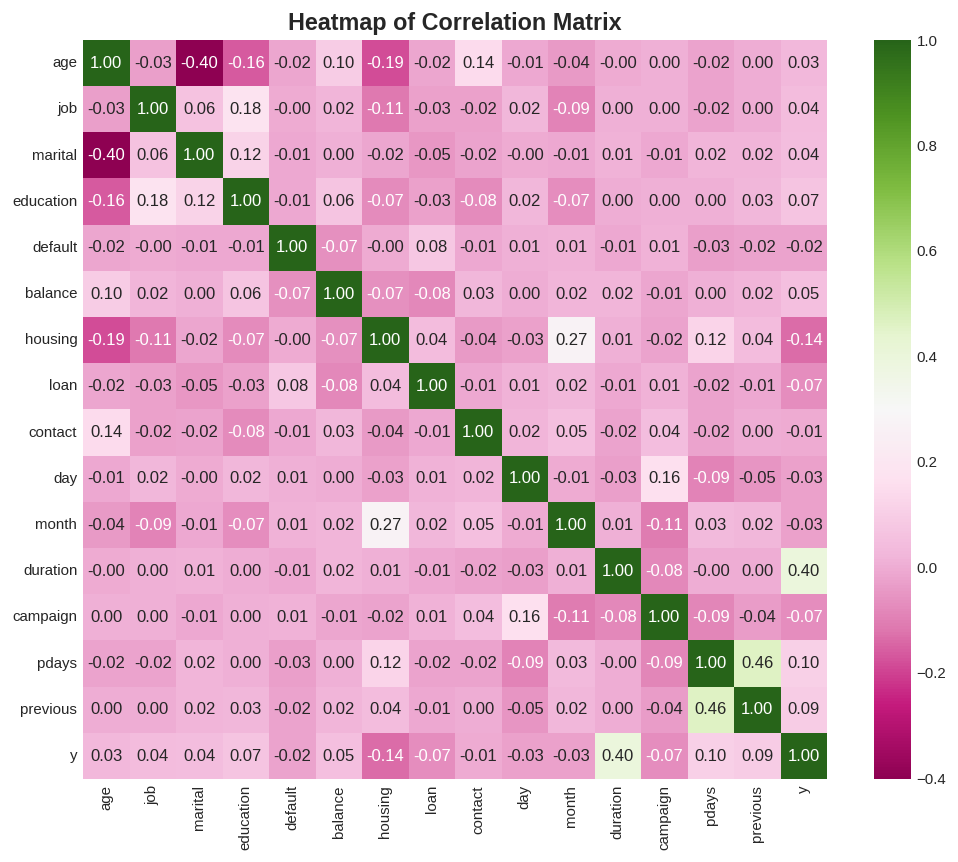

In [60]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

                age           job       marital     education       default  \
count  49732.000000  49732.000000  49732.000000  49732.000000  49732.000000   
mean      40.957472      4.303286      1.165909      1.149200      0.017916   
std       10.615008      3.236176      0.607476      0.665221      0.132648   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     10.000000      2.000000      2.000000      1.000000   

             balance       housing          loan       contact           day  \
count   49732.000000  49732.000000  49732.000000  49732.000000  49732.000000   
mean     1367.761562      0.556764      0.159555      0.091008     15.816315   
std      3041.608766      0.496772      0.366197

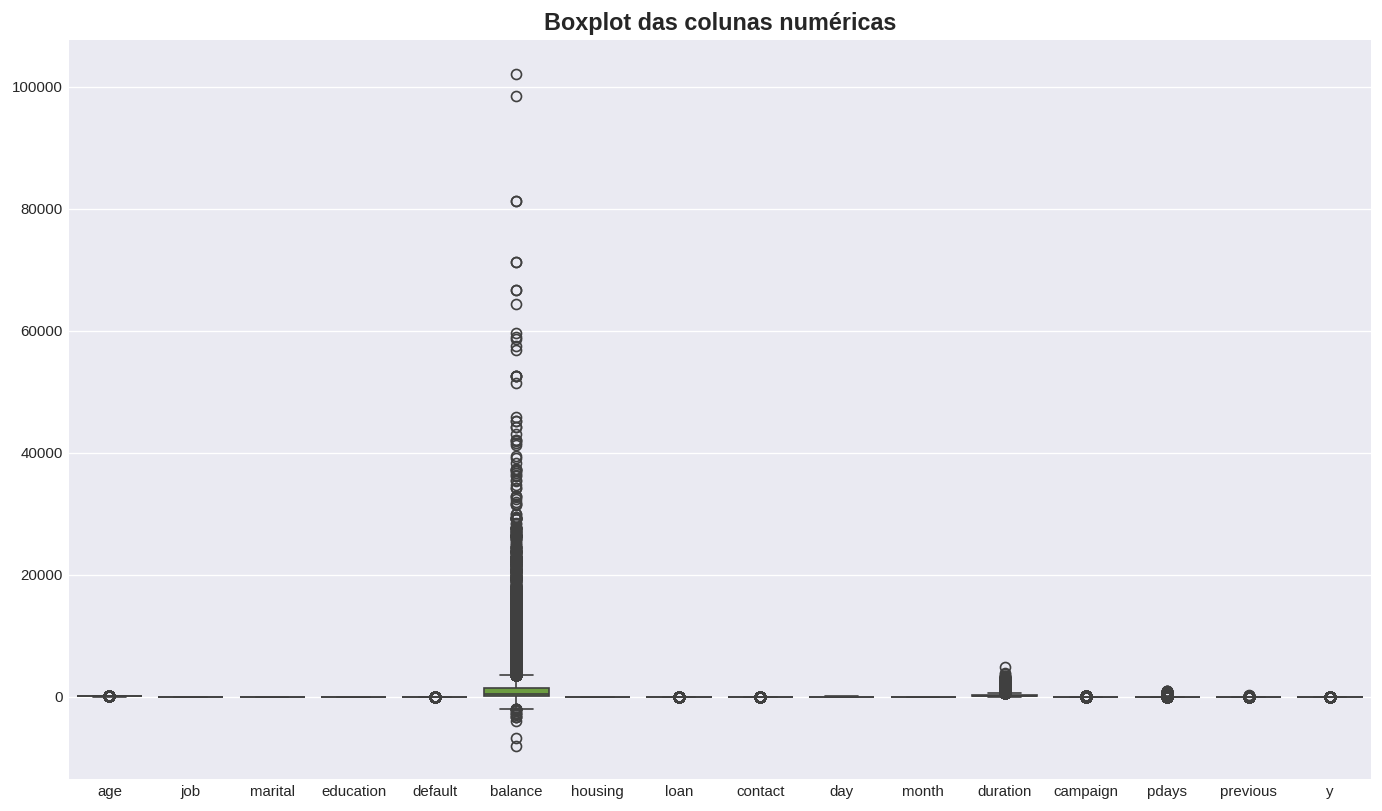

<Figure size 12000x3600 with 0 Axes>

In [61]:
#Boxplot do describe
print(df.describe())

# Boxplot para todas as colunas numéricas
sns.boxplot(data=df)

plt.title('Boxplot das colunas numéricas')
plt.figure(figsize=(100, 30))
plt.show()

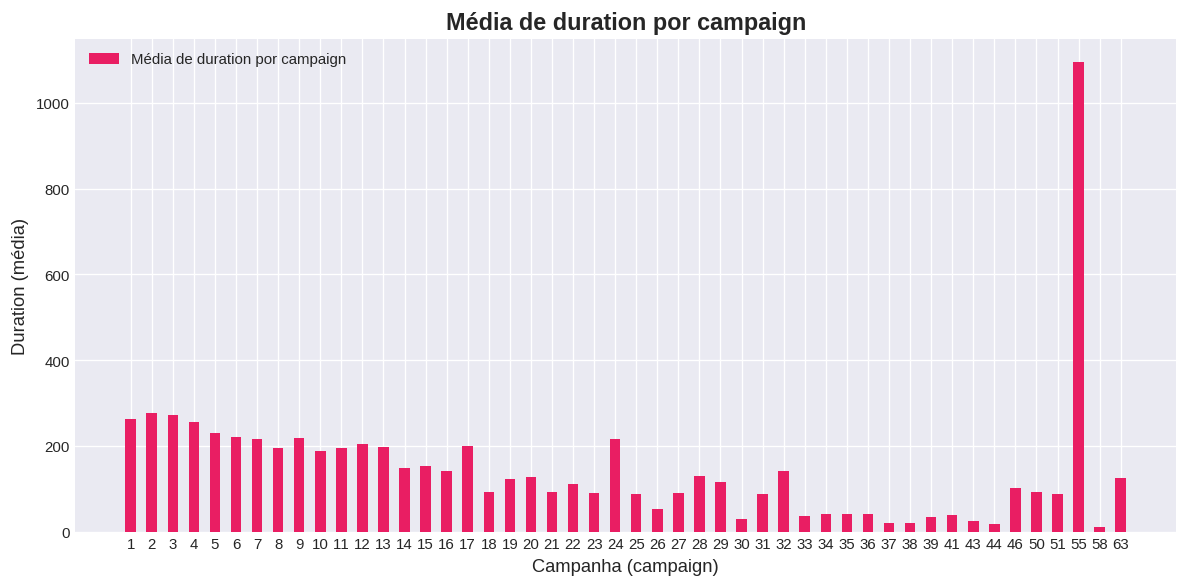

In [62]:

# Cor rosa
cor = "#e91e63"

plt.figure(figsize=(10, 5))

# Média de duration por campanha (campaign)
mean_duration = df.groupby("campaign")["duration"].mean()

# Posições no eixo X
x = np.arange(len(mean_duration))

# Plot das barras
plt.bar(
    x,
    mean_duration.values,
    width=0.5,
    color=cor,
    label="Média de duration por campaign"
)

plt.xlabel("Campanha (campaign)")
plt.ylabel("Duration (média)")
plt.title("Média de duration por campaign")
plt.xticks(x, mean_duration.index)
plt.legend()
plt.tight_layout()
plt.show()


# Clusterização
é uma técnica de machine learning não supervisionado que agrupa automaticamente elementos semelhantes em conjuntos chamados clusters.
O objetivo é fazer com que itens dentro do mesmo grupo sejam mais parecidos entre si do que com itens de outros grupos, revelando padrões e estruturas ocultas nos dados.

In [63]:

# ==========================================================================
# 1. PREPARAÇÃO DOS DADOS
# ==========================================================================
def prepare_data(df, cols):
    """
    Prepara dados para clusterização: codifica categóricas e escala numéricas.

    Args:
        df: DataFrame original
        cols: Lista de colunas para usar no clustering

    Returns:
        X: Matriz numpy para clustering
        df_cluster: DataFrame processado
        scaler: Objeto StandardScaler ajustado
        encoders: Dicionário com LabelEncoders para cada coluna categórica
    """
    df_cluster = df[cols].copy()
    encoders = {}

    # Identificar e codificar colunas categóricas
    for col in cols:
        if df_cluster[col].dtype == 'object':
            encoder = LabelEncoder()
            df_cluster[col] = encoder.fit_transform(df_cluster[col].astype(str))
            encoders[col] = encoder

    # Escalonamento de todas as features
    scaler = StandardScaler()
    df_cluster[cols] = scaler.fit_transform(df_cluster[cols])

    # Matriz final para K-Means
    X = df_cluster.values

    return X, df_cluster, scaler, encoders




In [64]:
# ==========================================================================
# 2. AVALIAÇÃO DE CLUSTERS
# ==========================================================================
def evaluate_clusters(X, k_range=range(2, 11)):
    """
    Avalia diferentes números de clusters usando inércia e silhouette.

    Args:
        X: Matriz de features
        k_range: Range de números de clusters a testar

    Returns:
        DataFrame com métricas para cada k
    """
    metrics = {'k': [], 'inertia': [], 'silhouette': []}

    print("Testando diferentes valores de k...")
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)

        metrics['k'].append(k)
        metrics['inertia'].append(kmeans.inertia_)
        metrics['silhouette'].append(silhouette_score(X, labels))

        print(f"  k={k}: Inércia={kmeans.inertia_:.2f}, Silhouette={silhouette_score(X, labels):.4f}")

    return pd.DataFrame(metrics)



    # O DataFrame df agora tem as colunas 'persona' e 'resultado'

In [65]:
# ==========================================================================
# 3. GRÁFICOS DE AVALIAÇÃO
# ==========================================================================
def plot_evaluation_metrics(metrics_df):
    """
    Plota gráficos de avaliação (Elbow e Silhouette).

    Args:
        metrics_df: DataFrame com métricas de avaliação

    Returns:
        best_k: Melhor número de clusters baseado no Silhouette Score
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Gráfico 1: Método do Cotovelo (Elbow)
    axes[0].plot(metrics_df['k'], metrics_df['inertia'], marker='o',
                 linewidth=2, markersize=8, color='steelblue')
    axes[0].set_xlabel('Número de Clusters (k)', fontweight='bold', fontsize=11)
    axes[0].set_ylabel('Inércia', fontweight='bold', fontsize=11)
    axes[0].set_title('Método do Cotovelo (Elbow)', fontweight='bold', fontsize=13)
    axes[0].grid(True, alpha=0.3)

    # Gráfico 2: Silhouette Score
    axes[1].plot(metrics_df['k'], metrics_df['silhouette'], marker='o',
                 linewidth=2, markersize=8, color='darkorange')
    axes[1].set_xlabel('Número de Clusters (k)', fontweight='bold', fontsize=11)
    axes[1].set_ylabel('Silhouette Score', fontweight='bold', fontsize=11)
    axes[1].set_title('Avaliação pelo Silhouette', fontweight='bold', fontsize=13)
    axes[1].grid(True, alpha=0.3)

    # Destacar melhor k
    best_k = metrics_df.loc[metrics_df['silhouette'].idxmax(), 'k']
    best_silhouette = metrics_df['silhouette'].max()
    axes[1].scatter([best_k], [best_silhouette], s=300, marker='*',
                    color='red', edgecolors='black', linewidths=2,
                    label=f'Melhor k={int(best_k)}', zorder=5)
    axes[1].legend(fontsize=10)

    plt.tight_layout()
    plt.show()

    return int(best_k)




In [66]:
# ==========================================================================
# 4. VISUALIZAÇÃO PCA
# ==========================================================================
def plot_clusters_pca(X, labels, best_k):
    """
    Visualiza clusters usando PCA 2D.

    Args:
        X: Matriz de features
        labels: Labels dos clusters
        best_k: Número de clusters usado
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    variance_explained = pca.explained_variance_ratio_

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels,
                         cmap='tab10', s=50, alpha=0.6, edgecolors='k', linewidths=0.5)
    plt.title(f'Visualização dos Clusters (PCA 2D) - k={best_k}',
              fontweight='bold', fontsize=14)
    plt.xlabel(f'PC1 ({variance_explained[0]:.1%} var.)', fontweight='bold', fontsize=11)
    plt.ylabel(f'PC2 ({variance_explained[1]:.1%} var.)', fontweight='bold', fontsize=11)

    cbar = plt.colorbar(scatter, label='Cluster')
    cbar.set_label('Cluster', fontweight='bold')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"\nVariância explicada pelo PCA: {sum(variance_explained):.1%}")




In [67]:
# ==========================================================================
# 5. ANÁLISE DE PERFIS DOS CLUSTERS
# ==========================================================================
def analyze_cluster_profiles(df, cluster_col, feature_cols):
    """
    Analisa o perfil de cada cluster.

    Args:
        df: DataFrame com dados e clusters
        cluster_col: Nome da coluna com os clusters
        feature_cols: Lista de features para analisar
    """
    print("\n" + "="*80)
    print("ANÁLISE DE PERFIS DOS CLUSTERS")
    print("="*80)

    for cluster_id in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster_id]
        print(f"\n{'─'*80}")
        print(f"PERSONA {cluster_id} (n={len(cluster_data)})")
        print(f"{'─'*80}")

        for col in feature_cols:
            if df[col].dtype == 'object':
                # Para categóricas, mostrar moda
                mode_val = cluster_data[col].mode()[0]
                freq = (cluster_data[col] == mode_val).sum()
                pct = freq / len(cluster_data) * 100
                print(f"  {col}: {mode_val} ({pct:.1f}%)")
            else:
                # Para numéricas, mostrar média
                mean_val = cluster_data[col].mean()
                print(f"  {col}: {mean_val:.2f}")




ANÁLISE DE CLUSTERING - BANKING DATASET

Features selecionadas: ['age', 'job', 'marital', 'education', 'loan', 'balance']
Shape dos dados: (49732, 16)

[1/5] Preparando dados...
✓ Dados preparados: (49732, 6)

[2/5] Avaliando clusters (k=2 a 10)...
Testando diferentes valores de k...
  k=2: Inércia=247148.17, Silhouette=0.1806
  k=3: Inércia=203655.37, Silhouette=0.2260
  k=4: Inércia=177621.78, Silhouette=0.2420
  k=5: Inércia=154209.30, Silhouette=0.2509
  k=6: Inércia=139129.48, Silhouette=0.2615
  k=7: Inércia=126728.88, Silhouette=0.2608
  k=8: Inércia=118382.51, Silhouette=0.2684
  k=9: Inércia=110893.20, Silhouette=0.2726
  k=10: Inércia=105953.63, Silhouette=0.2678

[3/5] Gerando gráficos de avaliação...


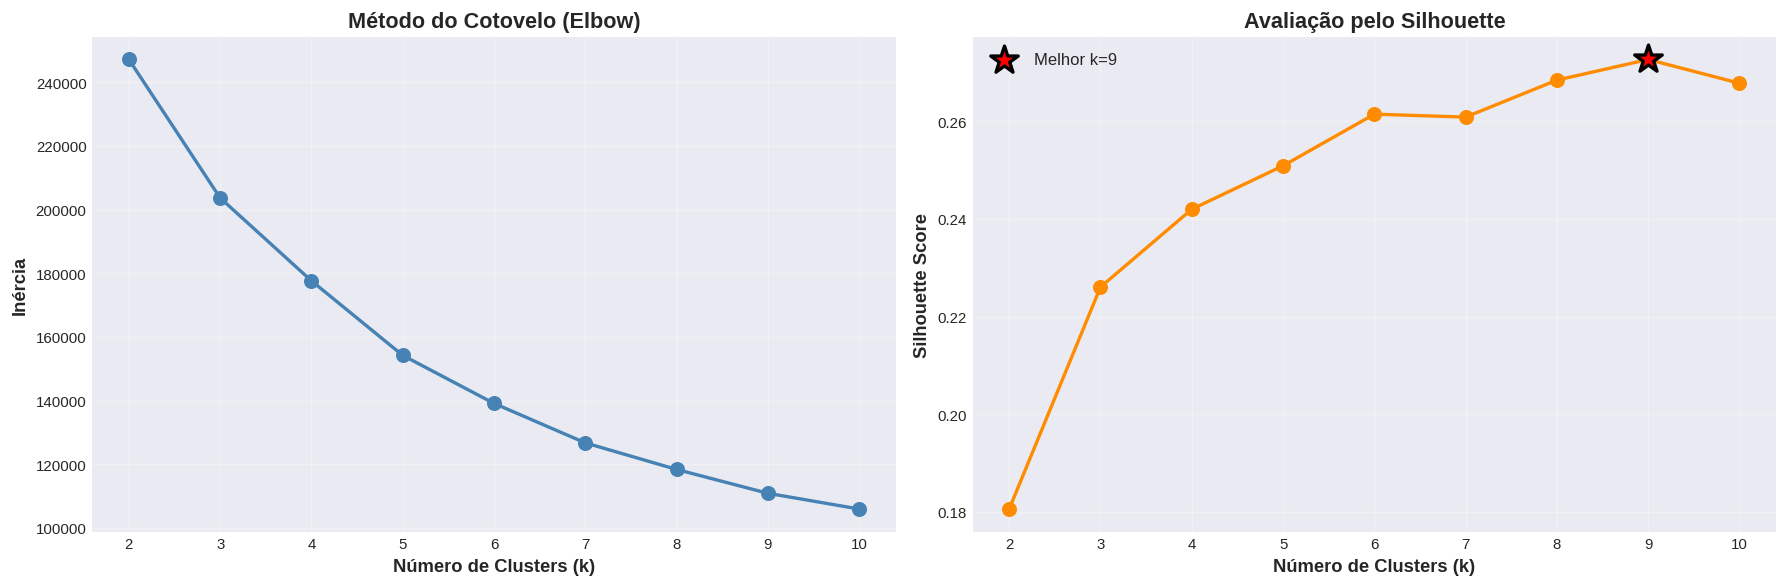

✓ Melhor número de clusters: 9

[4/5] Aplicando KMeans com k=9...
✓ Personas atribuídas e coluna 'resultado' criada a partir de 'y'

[5/5] Gerando visualização PCA...


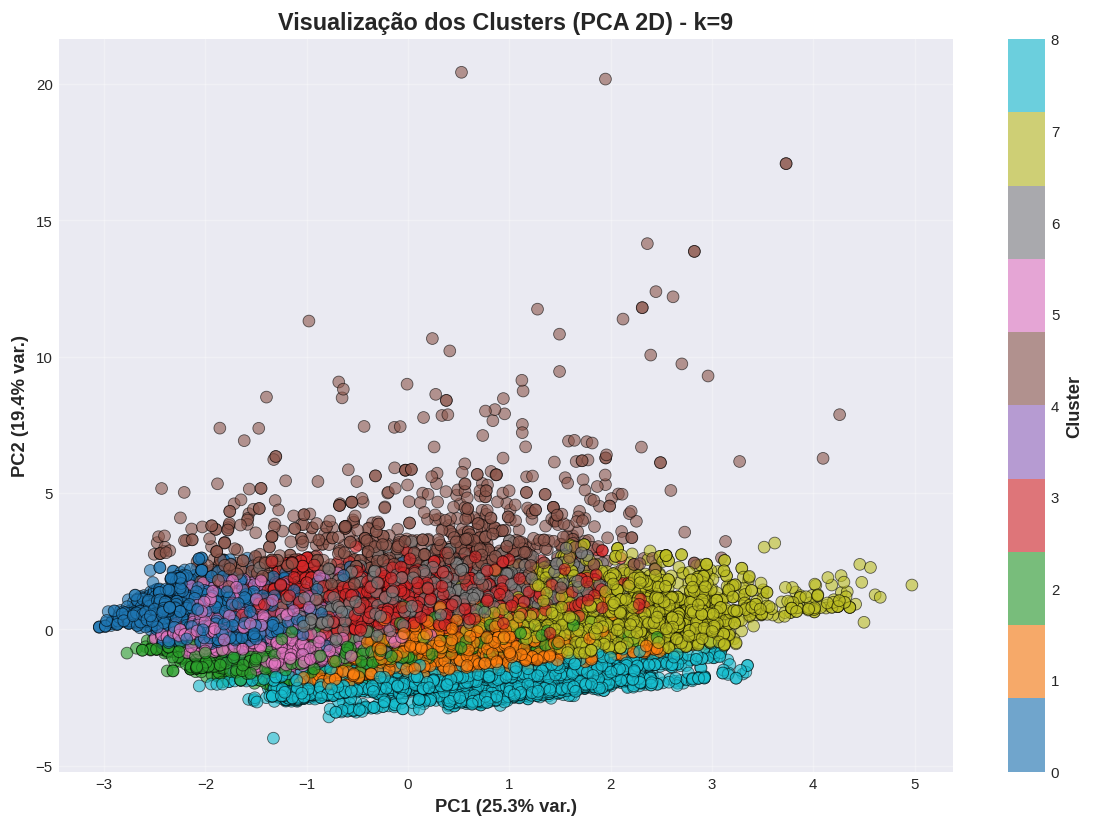


Variância explicada pelo PCA: 44.7%

RESUMO DOS CLUSTERS
  Persona 1: 5,250 clientes (10.6%)
  Persona 2: 9,174 clientes (18.4%)
  Persona 3: 4,259 clientes (8.6%)
  Persona 4: 7,861 clientes (15.8%)
  Persona 5: 949 clientes (1.9%)
  Persona 6: 5,889 clientes (11.8%)
  Persona 7: 6,836 clientes (13.7%)
  Persona 8: 5,880 clientes (11.8%)
  Persona 9: 3,634 clientes (7.3%)

ANÁLISE DE PERFIS DOS CLUSTERS

────────────────────────────────────────────────────────────────────────────────
PERSONA 1 (n=5250)
────────────────────────────────────────────────────────────────────────────────
  age: 32.29
  job: 8.25
  marital: 2.00
  education: 1.28
  loan: 0.00
  balance: 1087.97

────────────────────────────────────────────────────────────────────────────────
PERSONA 2 (n=9174)
────────────────────────────────────────────────────────────────────────────────
  age: 38.10
  job: 1.11
  marital: 0.95
  education: 0.66
  loan: 0.00
  balance: 885.47

─────────────────────────────────────────────

In [68]:
# ==========================================================================
# 6. EXECUÇÃO PRINCIPAL
# ==========================================================================
def run_clustering_analysis(df, feature_cols, target_col='y', k_range=range(2, 11)):
    """
    Executa a análise completa de clustering.

    Args:
        df: DataFrame com os dados
        feature_cols: Lista de colunas para usar no clustering
        target_col: Nome da coluna com o resultado/target (default: 'y')
        k_range: Range de k para testar

    Returns:
        df: DataFrame com clusters adicionados
        best_k: Melhor número de clusters
        kmeans_final: Modelo KMeans final
    """
    # Configurar estilo dos gráficos
    plt.style.use('seaborn-v0_8-darkgrid')

    print("="*80)
    print("ANÁLISE DE CLUSTERING - BANKING DATASET")
    print("="*80)
    print(f"\nFeatures selecionadas: {feature_cols}")
    print(f"Shape dos dados: {df.shape}")

    # 1. Preparar dados
    print("\n[1/5] Preparando dados...")
    X, df_cluster, scaler, encoders = prepare_data(df, feature_cols)
    print(f"✓ Dados preparados: {X.shape}")

    # 2. Avaliar diferentes números de clusters
    print(f"\n[2/5] Avaliando clusters (k={k_range.start} a {k_range.stop-1})...")
    metrics_df = evaluate_clusters(X, k_range=k_range)

    # 3. Escolher melhor k
    print("\n[3/5] Gerando gráficos de avaliação...")
    best_k = plot_evaluation_metrics(metrics_df)
    print(f"✓ Melhor número de clusters: {best_k}")

    # 4. Clusterização final
    print(f"\n[4/5] Aplicando KMeans com k={best_k}...")
    kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    clusters = kmeans_final.fit_predict(X)

    # Adicionar coluna persona ao DataFrame original
    df = df.copy()
    df["persona"] = clusters + 1

    # Adicionar coluna resultado se existir
    if target_col in df.columns:
        df["resultado"] = df[target_col]
        print(f"✓ Personas atribuídas e coluna 'resultado' criada a partir de '{target_col}'")
    else:
        print(f"✓ Personas atribuídas (coluna '{target_col}' não encontrada para criar 'resultado')")

    # 5. Visualizar com PCA
    print("\n[5/5] Gerando visualização PCA...")
    plot_clusters_pca(X, clusters, best_k)

    # Resumo final
    print("\n" + "="*80)
    print("RESUMO DOS CLUSTERS")
    print("="*80)
    cluster_counts = df["persona"].value_counts().sort_index()
    for persona, count in cluster_counts.items():
        pct = count / len(df) * 100
        print(f"  Persona {persona}: {count:,} clientes ({pct:.1f}%)")

    # Análise de perfis
    analyze_cluster_profiles(df, "persona", feature_cols)

    # Análise de conversão por persona (se resultado existir)
    if "resultado" in df.columns:
        print("\n" + "="*80)
        print("TAXA DE CONVERSÃO POR PERSONA")
        print("="*80)
        for persona in sorted(df["persona"].unique()):
            persona_data = df[df["persona"] == persona]
            if persona_data["resultado"].dtype == 'object':
                conversoes = (persona_data["resultado"] == "yes").sum()
            else:
                conversoes = persona_data["resultado"].sum()
            total = len(persona_data)
            taxa = conversoes / total * 100
            print(f"  Persona {persona}: {conversoes}/{total} conversões ({taxa:.1f}%)")

    print("\n" + "="*80)
    print("✓ ANÁLISE CONCLUÍDA!")
    print("="*80)

    return df, best_k, kmeans_final


# ==========================================================================
# EXEMPLO DE USO
# ==========================================================================
if __name__ == "__main__":
    # Supondo que df já está carregado
    # Selecionar features para clustering
    feature_cols = ["age", "job", "marital", "education", "loan",'balance']

    # Executar análise (assumindo que a coluna target é 'y')
    df, best_k, model = run_clustering_analysis(
        df=df.copy(),
        feature_cols=feature_cols,
        target_col='y',  # Nome da coluna com o resultado (yes/no)
        k_range=range(2, 11)
    )


In [69]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,persona,resultado
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,-1,0,0,7,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,-1,0,0,1,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,-1,0,0,9,0
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,-1,0,0,2,0
4,33,7,2,1,0,1,0,0,0,5,8,198,1,-1,0,0,1,0


# Testes de Algoritmo
Os algoritmos de classificação são modelos de machine learning supervisionado usados para prever categorias/classes a partir de dados. Eles aprendem a partir de exemplos rotulados e, depois, conseguem classificar novos casos.

🔹 Exemplos de algoritmos de classificação:

Logistic Regression

Decision Tree

Random Forest

Gradient Boosting (XGBoost, LightGBM, CatBoost)

KNN (K-Nearest Neighbors)

SVM (Support Vector Machine)

Naive Bayes

Rede Neural (MLPClassifier)

Servem para problemas como:
📌 detectar fraude,
📌 prever churn (saída de clientes),
📌 classificar e-mails (spam/não spam),
📌 prever compras, categorias, risco, etc.


            🎯 PIPELINE DE CLASSIFICAÇÃO ML - VERSÃO AVANÇADA COM CV             

🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
           PIPELINE COMPLETO DE MACHINE LEARNING COM CROSS-VALIDATION           
🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀


                             📊 PREPARAÇÃO DOS DADOS                             
✓ Features selecionadas: ['persona', 'campaign']
✓ Target: 'y'
✓ Shape: 49,732 amostras × 2 features
✓ Distribuição do target:
   Classe 0: 43,922 (88.3%)
   Classe 1: 5,810 (11.7%)
✓ Normalizando features com StandardScaler...
✓ Conjunto de Treino: 37,299 amostras
✓ Conjunto de Teste: 12,433 amostras
✓ Cross-Validation: 5 folds estratificados

                 🤖 TREINAMENTO E AVALIAÇÃO COM CROSS-VALIDATION                 

[ 1/11] Logistic Regression.......................... ✓ AUC: 0.5580 | CV: 0.5708±0.0082
[ 2/11] Lasso (L1)................................... ✓ AUC: 0.5580 | CV: 0.5708±0.0082
[ 3/11] Ridge (L2)................................... ✓ AUC: 0.558

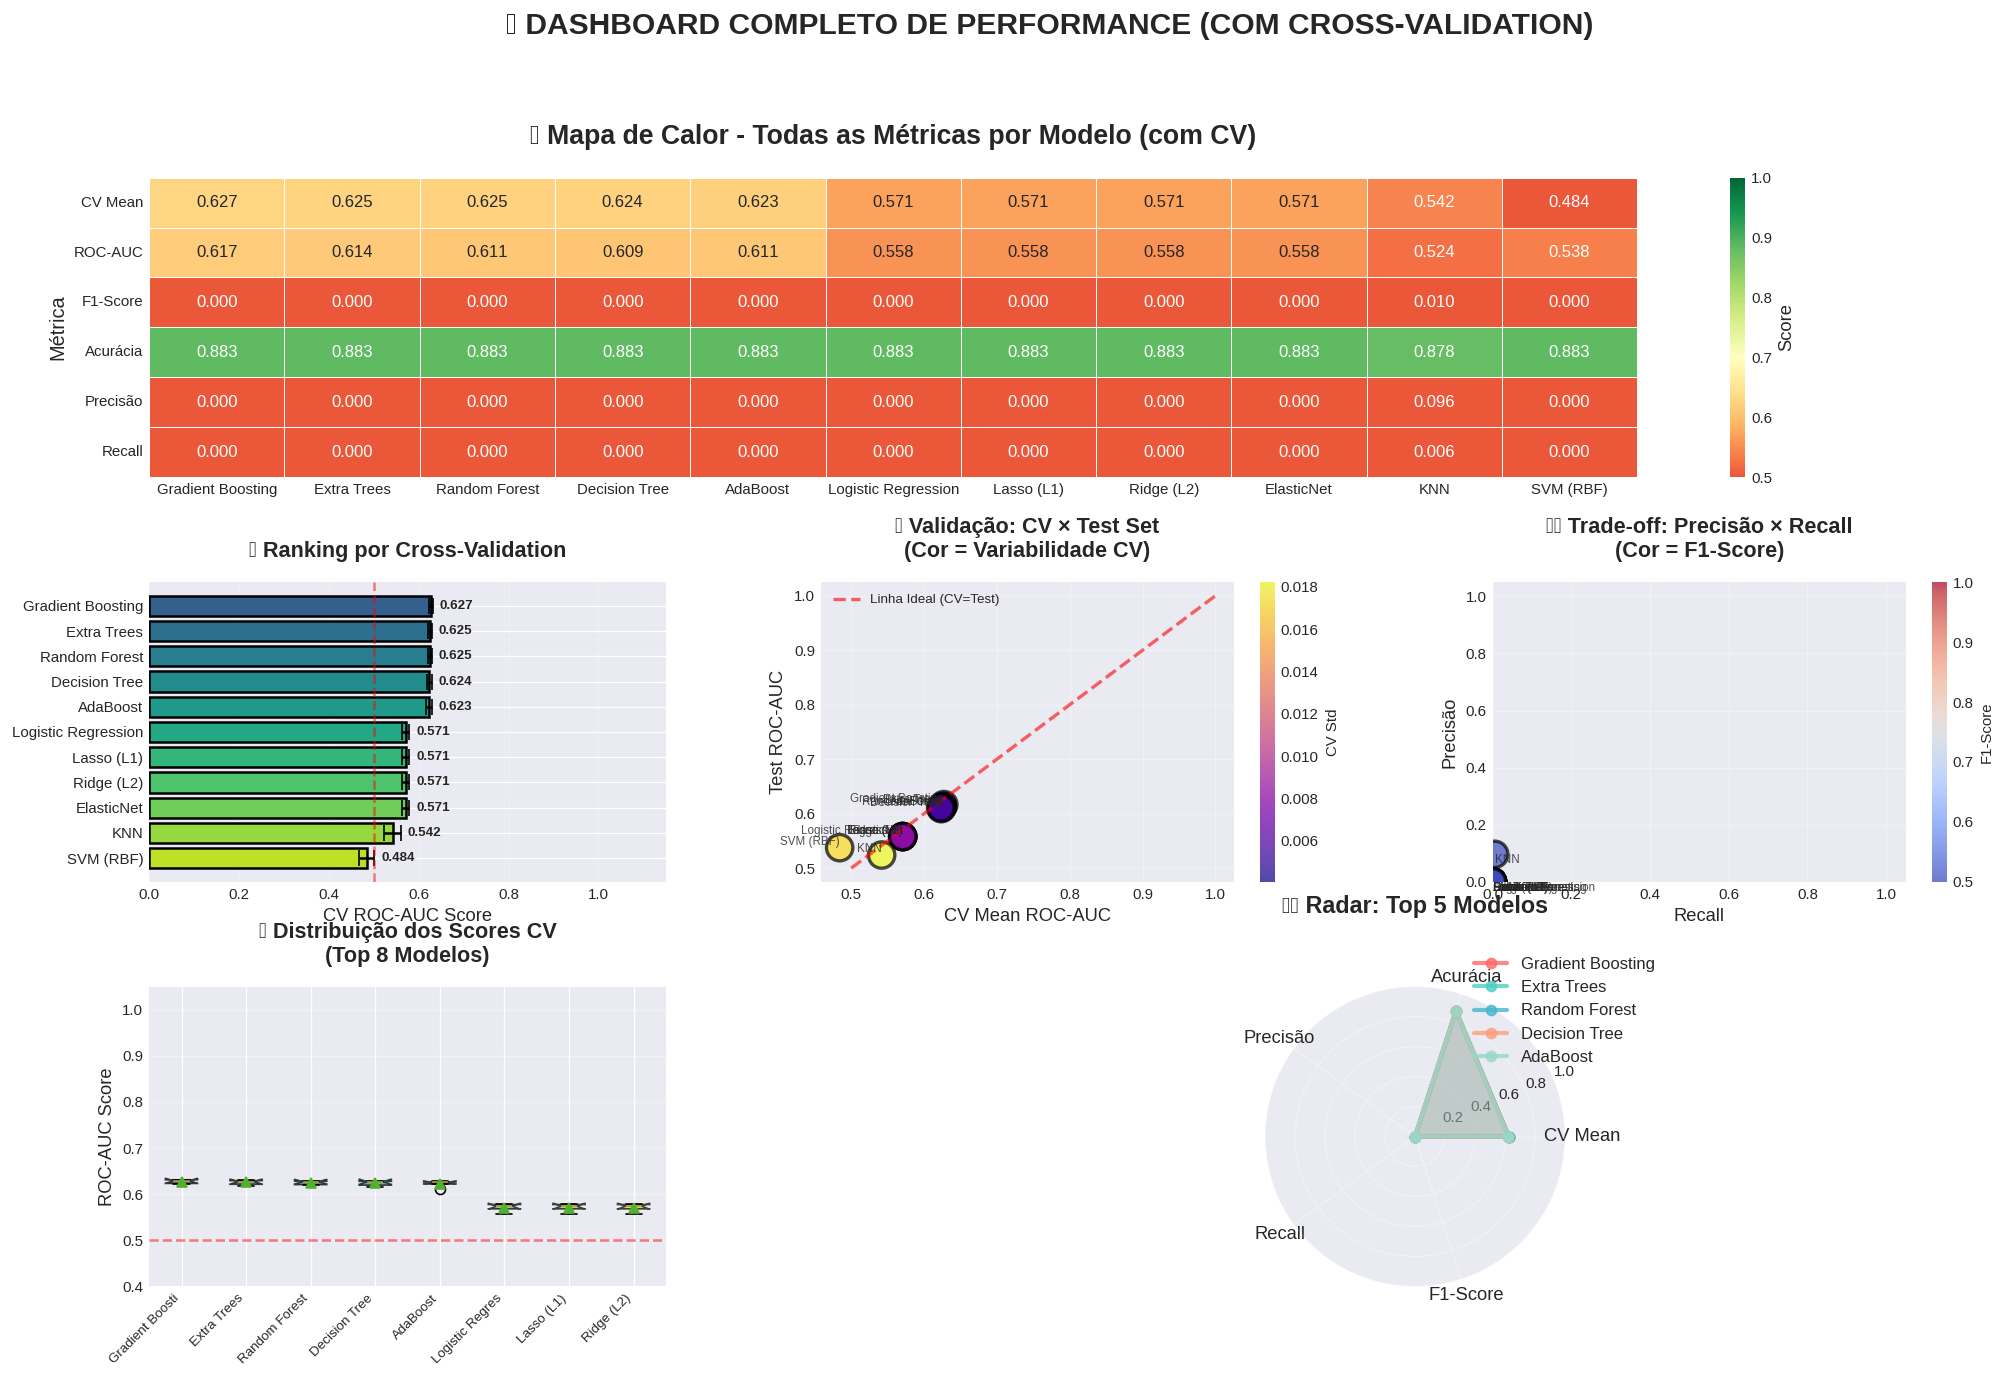

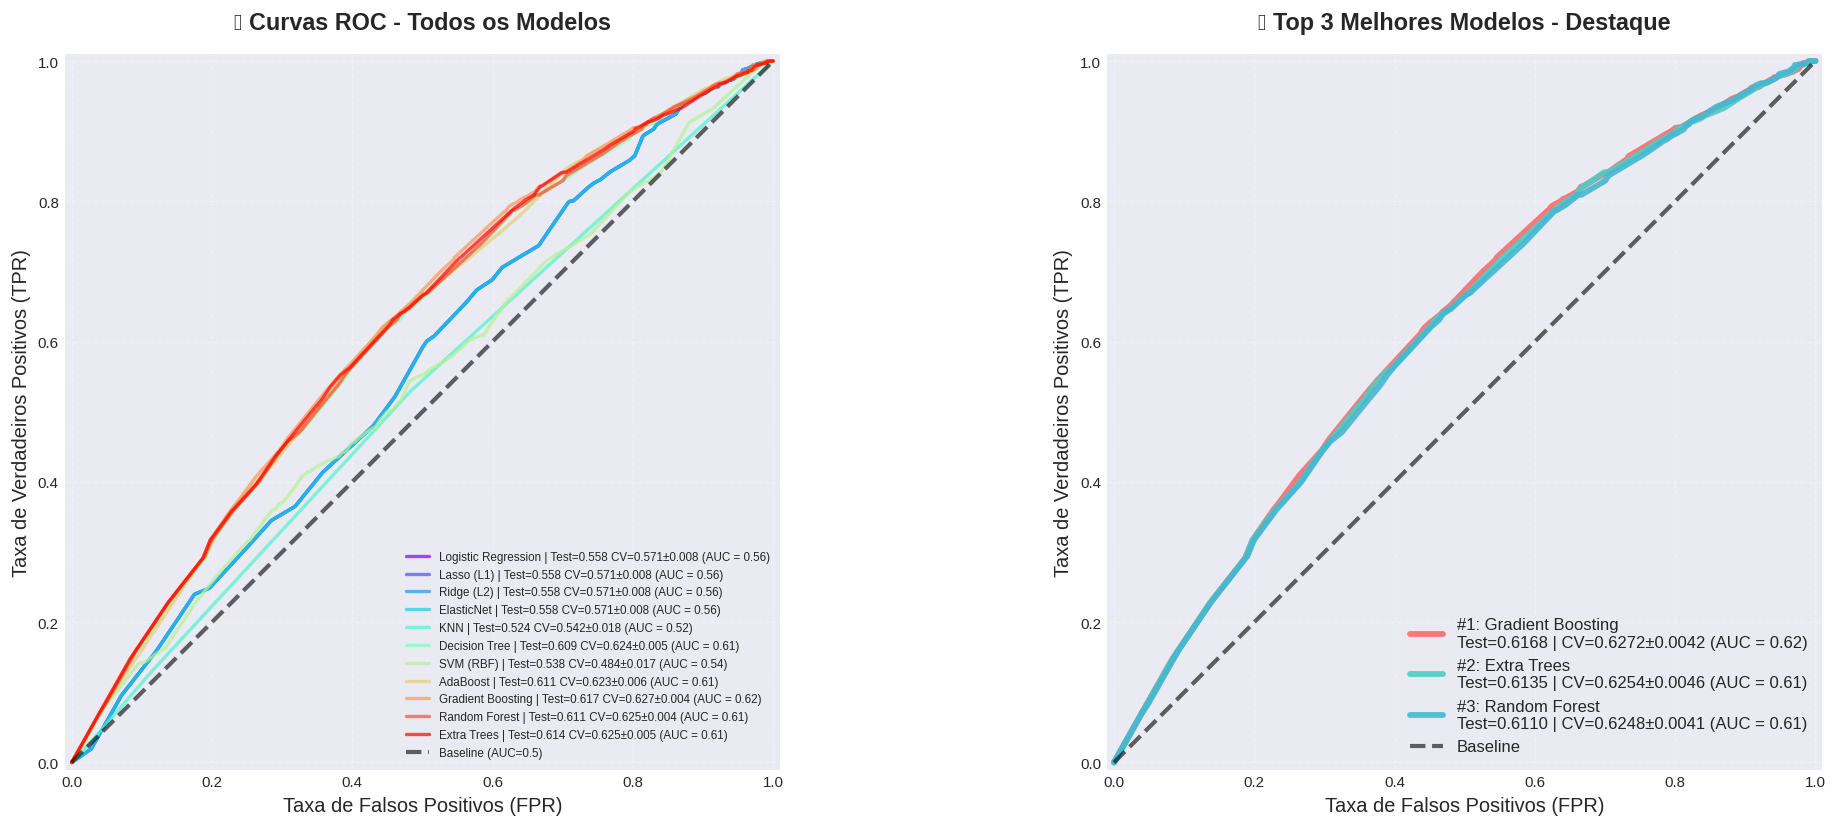

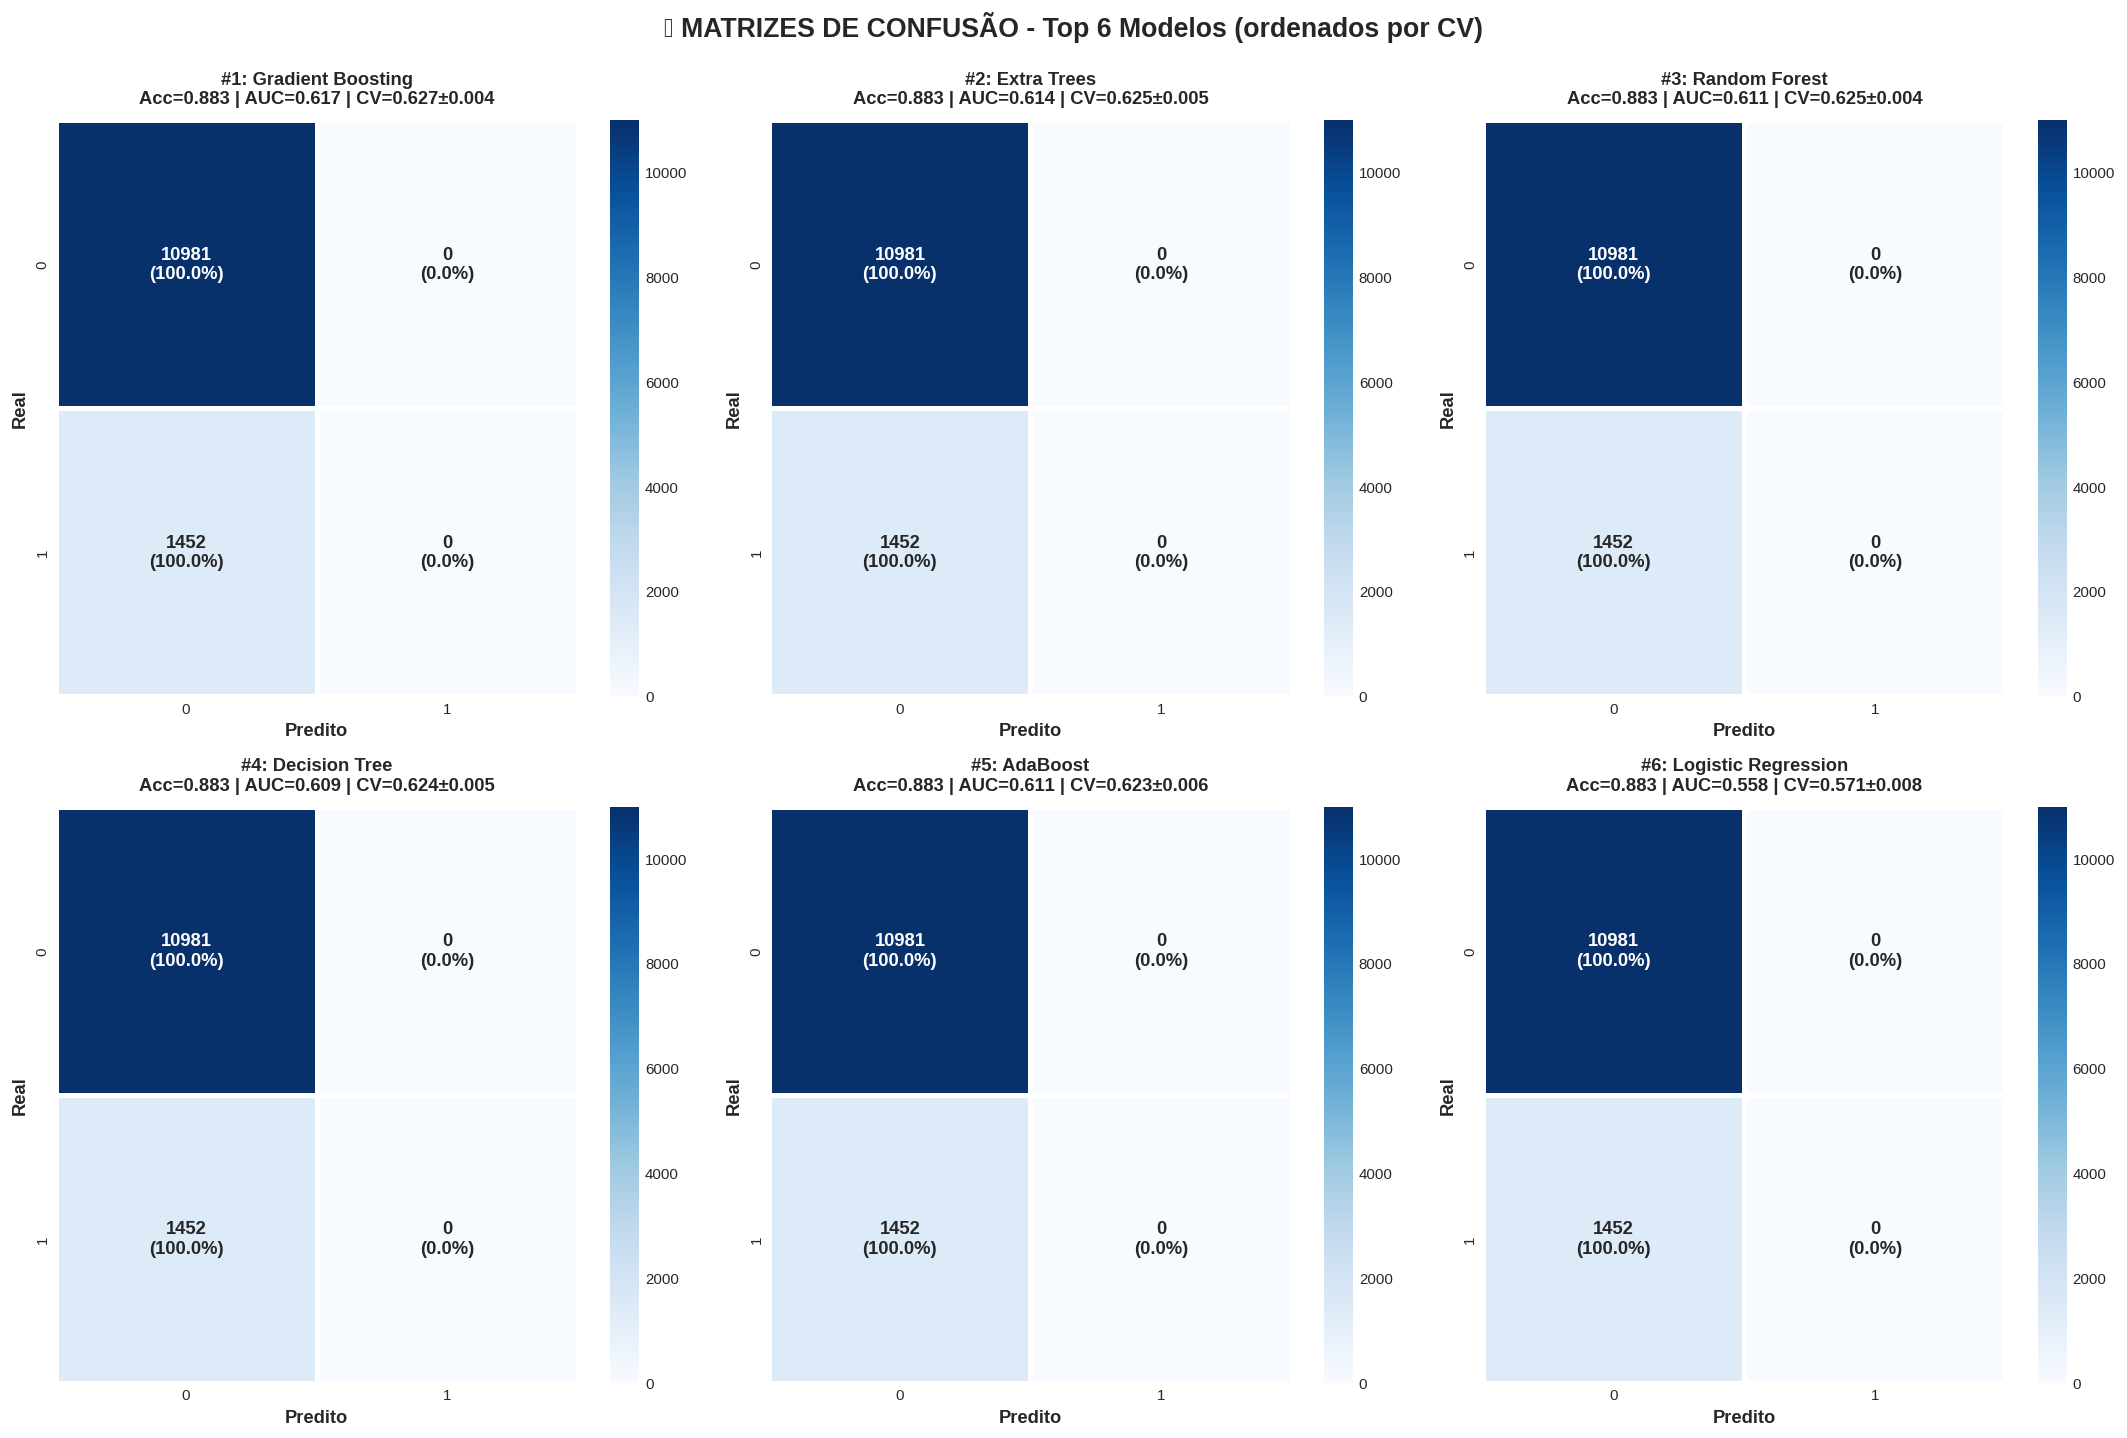

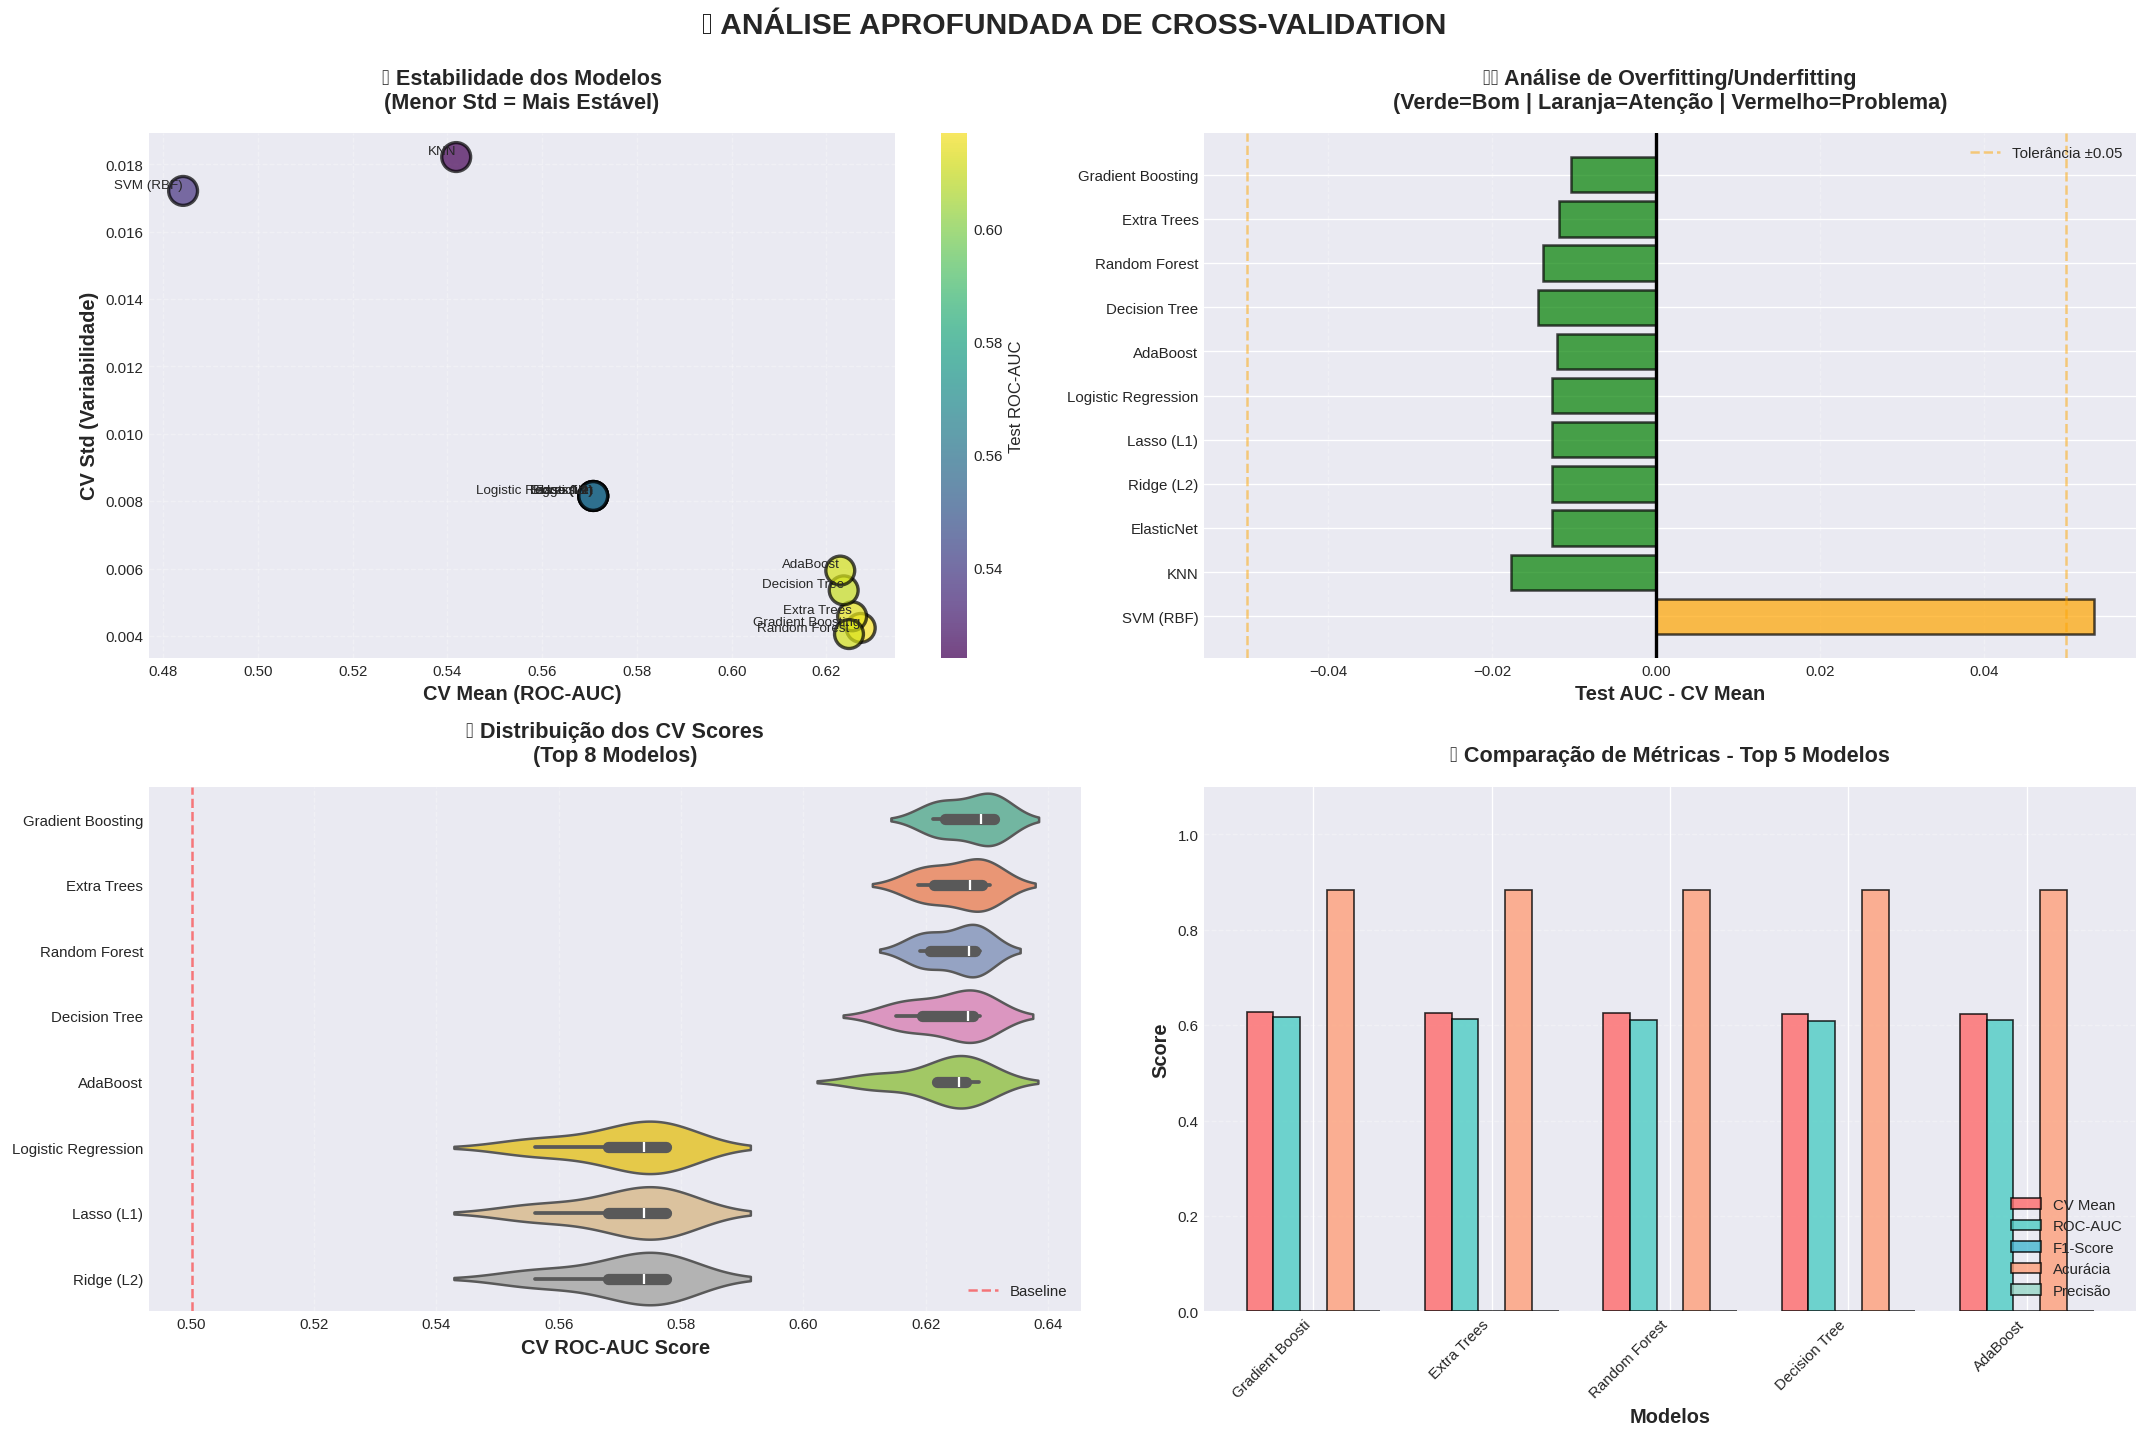

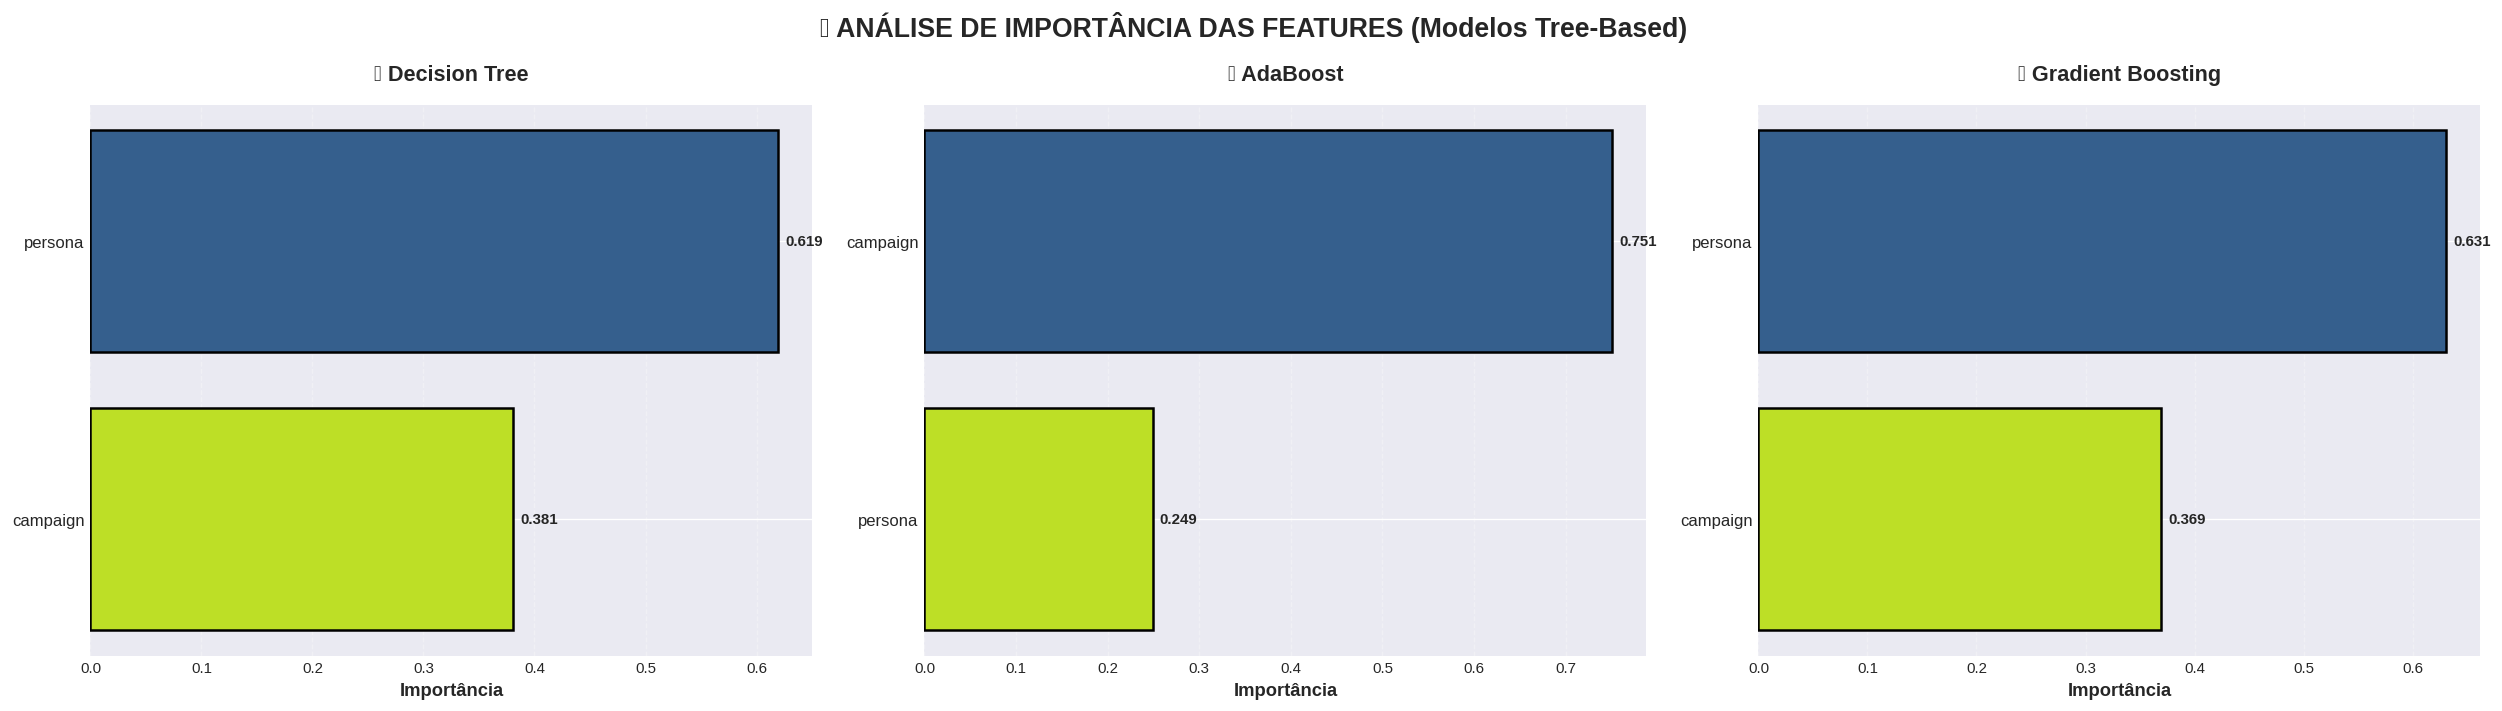


               📊 IMPORTÂNCIA DAS FEATURES - COMPARAÇÃO DETALHADA                

          Decision Tree  AdaBoost  Gradient Boosting  Random Forest  Extra Trees  Média    Std
persona          0.6194    0.2493             0.6307         0.5774       0.5960 0.5345 0.1438
campaign         0.3806    0.7507             0.3693         0.4226       0.4040 0.4655 0.1438




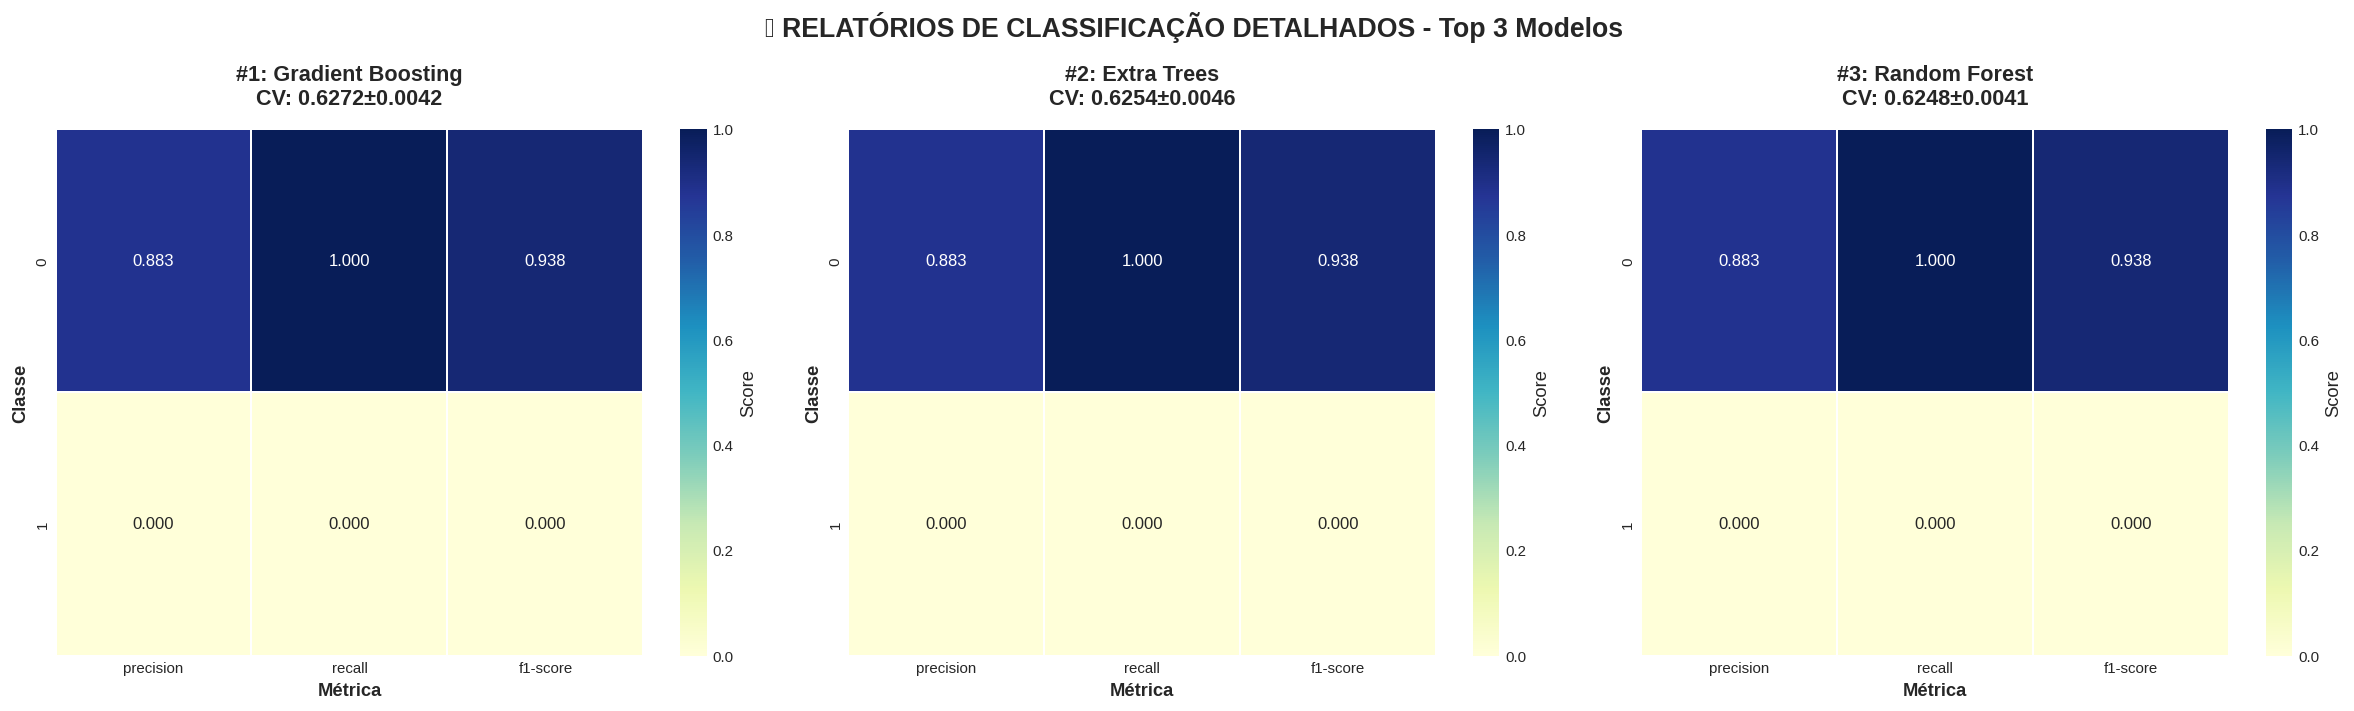


                      📋 RELATÓRIO FINAL - RESUMO EXECUTIVO                      

🏆 TOP 3 MODELOS:
--------------------------------------------------------------------------------

1º LUGAR: Gradient Boosting
   • CV Mean:      0.6272 ± 0.0042
   • Test ROC-AUC: 0.6168
   • F1-Score:     0.0000
   • Acurácia:     0.8832
   • Status:       ✅ BOA GENERALIZAÇÃO (Δ=-0.0104)

2º LUGAR: Extra Trees
   • CV Mean:      0.6254 ± 0.0046
   • Test ROC-AUC: 0.6135
   • F1-Score:     0.0000
   • Acurácia:     0.8832
   • Status:       ✅ BOA GENERALIZAÇÃO (Δ=-0.0119)

3º LUGAR: Random Forest
   • CV Mean:      0.6248 ± 0.0041
   • Test ROC-AUC: 0.6110
   • F1-Score:     0.0000
   • Acurácia:     0.8832
   • Status:       ✅ BOA GENERALIZAÇÃO (Δ=-0.0138)

--------------------------------------------------------------------------------

📊 ESTATÍSTICAS GERAIS:
   • Média CV:     0.5848
   • Mediana CV:   0.5708
   • Melhor CV:    0.6272
   • Pior CV:      0.4842
   • Range CV:     0.1431

-------------

In [70]:

import warnings
from typing import Dict, List, Tuple
warnings.filterwarnings("ignore")

# Configurações visuais avançadas
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9


class MLClassificationPipeline:
    """Pipeline completo para classificação com Cross-Validation e visualizações avançadas"""

    def __init__(self, df: pd.DataFrame, target_col: str, feature_cols: List[str] = None,
                 test_size: float = 0.25, cv_folds: int = 5, random_state: int = 42):
        """
        Inicializa o pipeline de ML com Cross-Validation

        Args:
            df: DataFrame com os dados
            target_col: Nome da coluna alvo
            feature_cols: Lista de colunas para usar como features (se None, usa todas exceto target)
            test_size: Proporção dos dados para teste
            cv_folds: Número de folds para cross-validation
            random_state: Seed para reprodutibilidade
        """
        self.df = df.copy()
        self.target_col = target_col
        self.feature_cols = feature_cols
        self.test_size = test_size
        self.cv_folds = cv_folds
        self.random_state = random_state

        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy="median")
        self.label_encoders = {}

        self.models = {}
        self.results = []
        self.predictions_prob = {}
        self.predictions_labels = {}
        self.cv_scores_all = {}
        self.feature_names = []

    def prepare_data(self):
        """Prepara os dados: separa features, codifica, imputa e normaliza"""
        print("\n" + "="*80)
        print("📊 PREPARAÇÃO DOS DADOS".center(80))
        print("="*80)

        if self.target_col is None:
            raise ValueError("Você deve especificar a coluna target.")

        if self.target_col not in self.df.columns:
            raise ValueError(f"Coluna '{self.target_col}' não encontrada no DataFrame.")

        # Selecionar features
        if self.feature_cols is not None:
            missing_cols = [col for col in self.feature_cols if col not in self.df.columns]
            if missing_cols:
                raise ValueError(f"Colunas não encontradas: {missing_cols}")
            X = self.df[self.feature_cols].copy()
            print(f"✓ Features selecionadas: {self.feature_cols}")
        else:
            X = self.df.drop(columns=[self.target_col])
            print(f"✓ Usando todas as colunas exceto '{self.target_col}'")

        y = self.df[self.target_col]

        print(f"✓ Target: '{self.target_col}'")
        print(f"✓ Shape: {X.shape[0]:,} amostras × {X.shape[1]} features")
        print(f"✓ Distribuição do target:")
        for classe, count in y.value_counts().sort_index().items():
            pct = count / len(y) * 100
            print(f"   Classe {classe}: {count:,} ({pct:.1f}%)")

        # Validação
        if y.nunique() < 2:
            raise ValueError(f"Target deve ter pelo menos 2 classes, encontrou: {y.unique()}")

        # Armazenar nomes
        self.feature_names = X.columns.tolist()


        # Divisão treino/teste estratificada
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state, stratify=y
        )

        # Normalização
        print(f"✓ Normalizando features com StandardScaler...")
        self.X_train = pd.DataFrame(
            self.scaler.fit_transform(self.X_train),
            columns=X.columns,
            index=self.X_train.index
        )
        self.X_test = pd.DataFrame(
            self.scaler.transform(self.X_test),
            columns=X.columns,
            index=self.X_test.index
        )

        print(f"✓ Conjunto de Treino: {self.X_train.shape[0]:,} amostras")
        print(f"✓ Conjunto de Teste: {self.X_test.shape[0]:,} amostras")
        print(f"✓ Cross-Validation: {self.cv_folds} folds estratificados")
        print("="*80 + "\n")

    def initialize_models(self):
        """Inicializa todos os modelos de classificação"""
        self.models = {
            "Logistic Regression": LogisticRegression(max_iter=1000, random_state=self.random_state),
            "Lasso (L1)": LogisticRegression(penalty="l1", solver="liblinear", random_state=self.random_state),
            "Ridge (L2)": LogisticRegression(penalty="l2", solver="lbfgs", random_state=self.random_state),
            "ElasticNet": LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5, max_iter=1000, random_state=self.random_state),
            "KNN": KNeighborsClassifier(n_neighbors=5),
            "Decision Tree": DecisionTreeClassifier(random_state=self.random_state, max_depth=10),
            "SVM (RBF)": SVC(probability=True, kernel='rbf', random_state=self.random_state),
            "AdaBoost": AdaBoostClassifier(random_state=self.random_state, n_estimators=100),
            "Gradient Boosting": GradientBoostingClassifier(random_state=self.random_state, n_estimators=100),
            "Random Forest": RandomForestClassifier(n_estimators=100, random_state=self.random_state, max_depth=10),
            "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=self.random_state, max_depth=10)
        }

    def train_and_evaluate(self):
        """Treina e avalia todos os modelos com Cross-Validation"""
        print("="*80)
        print("🤖 TREINAMENTO E AVALIAÇÃO COM CROSS-VALIDATION".center(80))
        print("="*80 + "\n")

        # Combinar dados para cross-validation
        X_full = pd.concat([self.X_train, self.X_test])
        y_full = pd.concat([self.y_train, self.y_test])

        # Configurar cross-validation estratificado
        cv_strategy = StratifiedKFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)

        for i, (name, model) in enumerate(self.models.items(), 1):
            print(f"[{i:2d}/{len(self.models)}] {name:.<45}", end=" ")

            try:
                # Cross-validation no conjunto completo
                cv_scores = cross_val_score(
                    model, X_full, y_full,
                    cv=cv_strategy,
                    scoring='roc_auc',
                    n_jobs=-1
                )
                self.cv_scores_all[name] = cv_scores

                # Treinar no conjunto de treino
                model.fit(self.X_train, self.y_train)

                # Predições no conjunto de teste
                y_pred = model.predict(self.X_test)
                y_prob = model.predict_proba(self.X_test)[:, 1]

                # Calcular métricas
                metrics = {
                    "Modelo": name,
                    "Acurácia": accuracy_score(self.y_test, y_pred),
                    "Precisão": precision_score(self.y_test, y_pred, zero_division=0),
                    "Recall": recall_score(self.y_test, y_pred, zero_division=0),
                    "F1-Score": f1_score(self.y_test, y_pred, zero_division=0),
                    "ROC-AUC": roc_auc_score(self.y_test, y_prob),
                    "CV Mean": cv_scores.mean(),
                    "CV Std": cv_scores.std(),
                    "CV Min": cv_scores.min(),
                    "CV Max": cv_scores.max()
                }

                self.results.append(metrics)
                self.predictions_prob[name] = y_prob
                self.predictions_labels[name] = y_pred

                print(f"✓ AUC: {metrics['ROC-AUC']:.4f} | CV: {metrics['CV Mean']:.4f}±{metrics['CV Std']:.4f}")

            except Exception as e:
                print(f"❌ ERRO: {str(e)}")
                continue

        print("\n" + "="*80 + "\n")

    def display_results(self):
        """Exibe tabela formatada de resultados com Cross-Validation"""
        print("="*80)
        print("📈 RESULTADOS COMPARATIVOS (COM CROSS-VALIDATION)".center(80))
        print("="*80 + "\n")

        results_df = pd.DataFrame(self.results).sort_values("CV Mean", ascending=False)

        # Formatação bonita
        pd.options.display.float_format = '{:.4f}'.format

        # Exibir tabela principal
        display_cols = ['Modelo', 'CV Mean', 'CV Std', 'ROC-AUC', 'F1-Score', 'Acurácia', 'Precisão', 'Recall']
        print(results_df[display_cols].to_string(index=False))
        print()

        # Destacar melhor modelo
        best = results_df.iloc[0]
        print("="*80)
        print(f"🏆 MELHOR MODELO (por Cross-Validation): {best['Modelo']}")
        print(f"   • CV Mean:     {best['CV Mean']:.4f} ± {best['CV Std']:.4f}")
        print(f"   • CV Range:    [{best['CV Min']:.4f}, {best['CV Max']:.4f}]")
        print(f"   • Test ROC-AUC: {best['ROC-AUC']:.4f}")
        print(f"   • Test F1-Score: {best['F1-Score']:.4f}")
        print(f"   • Test Acurácia: {best['Acurácia']:.4f}")

        # Análise de overfitting
        diff = best['ROC-AUC'] - best['CV Mean']
        if abs(diff) > 0.05:
            status = "⚠️ POSSÍVEL OVERFITTING" if diff > 0 else "⚠️ POSSÍVEL UNDERFITTING"
            print(f"   • {status} (diferença: {diff:+.4f})")
        else:
            print(f"   • ✅ BOA GENERALIZAÇÃO (diferença: {diff:+.4f})")

        print("="*80 + "\n")

        return results_df

    def plot_comprehensive_dashboard(self):
        """Dashboard completo com 6 gráficos principais incluindo CV"""
        results_df = pd.DataFrame(self.results).sort_values("CV Mean", ascending=False)

        fig = plt.figure(figsize=(20, 12))
        gs = GridSpec(3, 3, figure=fig, hspace=0.35, wspace=0.3)

        # 1. Comparação de Métricas (Heatmap)
        ax1 = fig.add_subplot(gs[0, :])
        metrics_df = results_df.set_index('Modelo')[['CV Mean', 'ROC-AUC', 'F1-Score', 'Acurácia', 'Precisão', 'Recall']]
        sns.heatmap(metrics_df.T, annot=True, fmt='.3f', cmap='RdYlGn', center=0.7,
                    cbar_kws={'label': 'Score'}, linewidths=0.5, ax=ax1, vmin=0.5, vmax=1.0)
        ax1.set_title('🎯 Mapa de Calor - Todas as Métricas por Modelo (com CV)', fontsize=16, pad=20)
        ax1.set_xlabel('')
        ax1.set_ylabel('Métrica', fontsize=12)

        # 2. Ranking de Modelos por CV (Barras Horizontais com erro)
        ax2 = fig.add_subplot(gs[1, 0])
        colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(results_df)))
        y_pos = np.arange(len(results_df))
        bars = ax2.barh(y_pos, results_df['CV Mean'], xerr=results_df['CV Std'],
                       color=colors, edgecolor='black', capsize=5, linewidth=1.5)
        ax2.set_yticks(y_pos)
        ax2.set_yticklabels(results_df['Modelo'], fontsize=9)
        for i, (bar, val, std) in enumerate(zip(bars, results_df['CV Mean'], results_df['CV Std'])):
            ax2.text(val + std + 0.015, bar.get_y() + bar.get_height()/2,
                    f'{val:.3f}', va='center', fontsize=8, fontweight='bold')
        ax2.set_xlabel('CV ROC-AUC Score', fontsize=11)
        ax2.set_title('🏅 Ranking por Cross-Validation', fontsize=13, pad=15)
        ax2.set_xlim(0, 1.15)
        ax2.invert_yaxis()
        ax2.grid(axis='x', alpha=0.3, linestyle='--')
        ax2.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Baseline')

        # 3. CV vs Test ROC-AUC (Scatter com linha de identidade)
        ax3 = fig.add_subplot(gs[1, 1])
        scatter = ax3.scatter(results_df['CV Mean'], results_df['ROC-AUC'],
                             s=250, c=results_df['CV Std'], cmap='plasma',
                             alpha=0.7, edgecolors='black', linewidth=2)
        # Linha de identidade
        lims = [
            max(ax3.get_xlim()[0], ax3.get_ylim()[0]),
            min(ax3.get_xlim()[1], ax3.get_ylim()[1])
        ]
        ax3.plot([0.5, 1.0], [0.5, 1.0], 'r--', alpha=0.6, linewidth=2, label='Linha Ideal (CV=Test)')

        for idx, row in results_df.iterrows():
            ax3.annotate(row['Modelo'], (row['CV Mean'], row['ROC-AUC']),
                        fontsize=7, ha='right', va='bottom', alpha=0.8)
        ax3.set_xlabel('CV Mean ROC-AUC', fontsize=11)
        ax3.set_ylabel('Test ROC-AUC', fontsize=11)
        ax3.set_title('🎪 Validação: CV × Test Set\n(Cor = Variabilidade CV)', fontsize=13, pad=15)
        ax3.legend(fontsize=8)
        ax3.grid(alpha=0.3)
        cbar = plt.colorbar(scatter, ax=ax3)
        cbar.set_label('CV Std', fontsize=9)

        # 4. Precision vs Recall (Scatter)
        ax4 = fig.add_subplot(gs[1, 2])
        scatter2 = ax4.scatter(results_df['Recall'], results_df['Precisão'],
                              s=250, c=results_df['F1-Score'], cmap='coolwarm',
                              alpha=0.7, edgecolors='black', linewidth=2, vmin=0.5, vmax=1)
        for idx, row in results_df.iterrows():
            ax4.annotate(row['Modelo'], (row['Recall'], row['Precisão']),
                        fontsize=7, ha='left', va='top', alpha=0.8)
        ax4.set_xlabel('Recall', fontsize=11)
        ax4.set_ylabel('Precisão', fontsize=11)
        ax4.set_title('⚖️ Trade-off: Precisão × Recall\n(Cor = F1-Score)', fontsize=13, pad=15)
        cbar2 = plt.colorbar(scatter2, ax=ax4)
        cbar2.set_label('F1-Score', fontsize=9)
        ax4.grid(alpha=0.3)
        ax4.set_xlim([0, 1.05])
        ax4.set_ylim([0, 1.05])

        # 5. Distribuição de CV Scores (Boxplot)
        ax5 = fig.add_subplot(gs[2, 0])
        cv_data = []
        labels = []
        for name in results_df['Modelo'].head(8):  # Top 8 modelos
            if name in self.cv_scores_all:
                cv_data.append(self.cv_scores_all[name])
                labels.append(name[:15])  # Truncar nome

        bp = ax5.boxplot(cv_data, labels=labels, patch_artist=True,
                        notch=True, showmeans=True)
        for patch, color in zip(bp['boxes'], plt.cm.viridis(np.linspace(0.3, 0.9, len(cv_data)))):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        ax5.set_ylabel('ROC-AUC Score', fontsize=11)
        ax5.set_title('📊 Distribuição dos Scores CV\n(Top 8 Modelos)', fontsize=13, pad=15)
        ax5.set_ylim(0.4, 1.05)
        ax5.grid(axis='y', alpha=0.3)
        ax5.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
        ax5.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)

        # 6. Radar Chart - Top 5 Modelos
        ax6 = fig.add_subplot(gs[2, 1:], projection='polar')
        top5 = results_df.head(5)
        categories = ['CV Mean', 'Acurácia', 'Precisão', 'Recall', 'F1-Score']
        N = len(categories)
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]

        colors_radar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
        for idx, (_, row) in enumerate(top5.iterrows()):
            values = row[categories].values.tolist()
            values += values[:1]
            ax6.plot(angles, values, 'o-', linewidth=2.5, label=row['Modelo'],
                    color=colors_radar[idx], alpha=0.8)
            ax6.fill(angles, values, alpha=0.15, color=colors_radar[idx])

        ax6.set_xticks(angles[:-1])
        ax6.set_xticklabels(categories, fontsize=11)
        ax6.set_ylim(0, 1)
        ax6.set_title('🕸️ Radar: Top 5 Modelos', fontsize=14, pad=30, y=1.08)
        ax6.legend(loc='upper right', bbox_to_anchor=(1.35, 1.15), fontsize=10)
        ax6.grid(True, alpha=0.3)

        plt.suptitle('📊 DASHBOARD COMPLETO DE PERFORMANCE (COM CROSS-VALIDATION)',
                    fontsize=18, fontweight='bold', y=0.995)
        plt.show()

    def plot_roc_curves_enhanced(self):
        """Curvas ROC melhoradas com destaque e CV"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

        results_df = pd.DataFrame(self.results).sort_values("CV Mean", ascending=False)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(self.models)))

        # Painel 1: Todas as curvas ROC
        for i, (name, color) in enumerate(zip(self.models.keys(), colors)):
            if name in self.predictions_prob:
                model_result = results_df[results_df['Modelo']==name]
                if len(model_result) > 0:
                    auc_test = model_result['ROC-AUC'].values[0]
                    auc_cv = model_result['CV Mean'].values[0]
                    cv_std = model_result['CV Std'].values[0]

                    RocCurveDisplay.from_predictions(
                        self.y_test, self.predictions_prob[name],
                        name=f"{name[:20]} | Test={auc_test:.3f} CV={auc_cv:.3f}±{cv_std:.3f}",
                        color=color, alpha=0.7, ax=ax1, linewidth=2
                    )

        ax1.plot([0, 1], [0, 1], 'k--', linewidth=2.5, label='Baseline (AUC=0.5)', alpha=0.6)
        ax1.set_title('📈 Curvas ROC - Todos os Modelos', fontsize=14, fontweight='bold', pad=15)
        ax1.set_xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
        ax1.set_ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
        ax1.legend(loc='lower right', fontsize=7, framealpha=0.9)
        ax1.grid(alpha=0.3, linestyle='--')

        # Painel 2: Top 3 Modelos destacados
        top3 = results_df.head(3)
        colors_top = ['#FF6B6B', '#4ECDC4', '#45B7D1']

        for idx, (name, color) in enumerate(zip(top3['Modelo'], colors_top)):
            model_result = top3[top3['Modelo']==name]
            auc_test = model_result['ROC-AUC'].values[0]
            auc_cv = model_result['CV Mean'].values[0]
            cv_std = model_result['CV Std'].values[0]

            RocCurveDisplay.from_predictions(
                self.y_test, self.predictions_prob[name],
                name=f"#{idx+1}: {name}\nTest={auc_test:.4f} | CV={auc_cv:.4f}±{cv_std:.4f}",
                color=color, linewidth=3.5, alpha=0.9, ax=ax2
            )

        ax2.plot([0, 1], [0, 1], 'k--', linewidth=2.5, label='Baseline', alpha=0.6)
        ax2.set_title('🏆 Top 3 Melhores Modelos - Destaque', fontsize=14, fontweight='bold', pad=15)
        ax2.set_xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
        ax2.set_ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
        ax2.legend(loc='lower right', fontsize=10, framealpha=0.95)
        ax2.grid(alpha=0.3, linestyle='--')

        plt.tight_layout()
        plt.show()

    def plot_confusion_matrices_grid(self):
        """Grade de matrizes de confusão - Top 6 modelos"""
        results_df = pd.DataFrame(self.results).sort_values("CV Mean", ascending=False)
        top6 = results_df.head(6)

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()

        for idx, (ax, model_name) in enumerate(zip(axes, top6['Modelo'])):
            y_pred = self.predictions_labels[model_name]
            cm = confusion_matrix(self.y_test, y_pred)

            # Calcular percentuais
            cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

            # Criar anotações com contagem e percentual
            annot = np.array([[f'{val}\n({pct:.1f}%)' for val, pct in zip(row_cm, row_pct)]
                             for row_cm, row_pct in zip(cm, cm_pct)])

            sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', cbar=True,
                       annot_kws={'fontsize': 11, 'fontweight': 'bold'},
                       linewidths=2, linecolor='white', ax=ax)

            model_result = top6[top6['Modelo'] == model_name]
            accuracy = model_result['Acurácia'].values[0]
            auc = model_result['ROC-AUC'].values[0]
            cv_mean = model_result['CV Mean'].values[0]
            cv_std = model_result['CV Std'].values[0]

            ax.set_title(f'#{idx+1}: {model_name}\nAcc={accuracy:.3f} | AUC={auc:.3f} | CV={cv_mean:.3f}±{cv_std:.3f}',
                        fontsize=11, fontweight='bold', pad=10)
            ax.set_xlabel('Predito', fontsize=11, fontweight='bold')
            ax.set_ylabel('Real', fontsize=11, fontweight='bold')

        plt.suptitle('🎯 MATRIZES DE CONFUSÃO - Top 6 Modelos (ordenados por CV)',
                    fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()

    def plot_feature_importance_advanced(self):
        """Importância de features com comparação entre modelos tree-based"""
        tree_models = {}
        for name, model in self.models.items():
            if hasattr(model, 'feature_importances_'):
                tree_models[name] = model

        if len(tree_models) == 0:
            print("⚠️ Nenhum modelo tree-based encontrado para análise de importância de features.")
            return

        n_models = len(tree_models)
        fig, axes = plt.subplots(1, min(n_models, 3), figsize=(7*min(n_models, 3), 6))

        if n_models == 1:
            axes = [axes]

        for ax, (name, model) in zip(axes, list(tree_models.items())[:3]):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]

            colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(indices)))
            bars = ax.barh(range(len(indices)), importances[indices], color=colors, edgecolor='black', linewidth=1.5)

            ax.set_yticks(range(len(indices)))
            ax.set_yticklabels([self.feature_names[i] for i in indices], fontsize=10)
            ax.set_xlabel('Importância', fontsize=11, fontweight='bold')
            ax.set_title(f'🌳 {name}', fontsize=13, fontweight='bold', pad=15)
            ax.invert_yaxis()
            ax.grid(axis='x', alpha=0.3, linestyle='--')

            # Adicionar valores nas barras
            for bar, val in zip(bars, importances[indices]):
                ax.text(val + max(importances)*0.01, bar.get_y() + bar.get_height()/2,
                       f'{val:.3f}', va='center', fontsize=9, fontweight='bold')

        plt.suptitle('🔍 ANÁLISE DE IMPORTÂNCIA DAS FEATURES (Modelos Tree-Based)',
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # Tabela comparativa detalhada
        print("\n" + "="*80)
        print("📊 IMPORTÂNCIA DAS FEATURES - COMPARAÇÃO DETALHADA".center(80))
        print("="*80 + "\n")

        importance_df = pd.DataFrame()
        for name, model in tree_models.items():
            importance_df[name] = model.feature_importances_

        importance_df.index = self.feature_names
        importance_df['Média'] = importance_df.mean(axis=1)
        importance_df['Std'] = importance_df.std(axis=1)
        importance_df = importance_df.sort_values('Média', ascending=False)

        pd.options.display.float_format = '{:.4f}'.format
        print(importance_df.to_string())
        print("\n" + "="*80 + "\n")

    def plot_classification_reports(self):
        """Relatórios de classificação visuais - Top 3"""
        results_df = pd.DataFrame(self.results).sort_values("CV Mean", ascending=False)
        top3 = results_df.head(3)

        fig, axes = plt.subplots(1, 3, figsize=(20, 6))

        for idx, (ax, model_name) in enumerate(zip(axes, top3['Modelo'])):
            y_pred = self.predictions_labels[model_name]
            report = classification_report(self.y_test, y_pred, output_dict=True, zero_division=0)

            # Converter para DataFrame
            df_report = pd.DataFrame(report).transpose()
            df_report = df_report.iloc[:-3, :-1]  # Remover linhas de média

            sns.heatmap(df_report, annot=True, fmt='.3f', cmap='YlGnBu',
                       cbar_kws={'label': 'Score'}, linewidths=1, ax=ax,
                       vmin=0, vmax=1)

            model_result = top3[top3['Modelo'] == model_name]
            cv_mean = model_result['CV Mean'].values[0]
            cv_std = model_result['CV Std'].values[0]

            ax.set_title(f'#{idx+1}: {model_name}\nCV: {cv_mean:.4f}±{cv_std:.4f}',
                        fontsize=13, fontweight='bold', pad=15)
            ax.set_xlabel('Métrica', fontsize=11, fontweight='bold')
            ax.set_ylabel('Classe', fontsize=11, fontweight='bold')

        plt.suptitle('📊 RELATÓRIOS DE CLASSIFICAÇÃO DETALHADOS - Top 3 Modelos',
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

    def plot_cv_analysis(self):
        """Análise detalhada de Cross-Validation"""
        results_df = pd.DataFrame(self.results).sort_values("CV Mean", ascending=False)

        fig, axes = plt.subplots(2, 2, figsize=(18, 12))

        # 1. CV Mean vs CV Std
        ax1 = axes[0, 0]
        scatter = ax1.scatter(results_df['CV Mean'], results_df['CV Std'],
                             s=300, c=results_df['ROC-AUC'], cmap='viridis',
                             alpha=0.7, edgecolors='black', linewidth=2)
        for idx, row in results_df.iterrows():
            ax1.annotate(row['Modelo'], (row['CV Mean'], row['CV Std']),
                        fontsize=8, ha='right', va='bottom')
        ax1.set_xlabel('CV Mean (ROC-AUC)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('CV Std (Variabilidade)', fontsize=12, fontweight='bold')
        ax1.set_title('📊 Estabilidade dos Modelos\n(Menor Std = Mais Estável)', fontsize=13, pad=15)
        cbar1 = plt.colorbar(scatter, ax=ax1)
        cbar1.set_label('Test ROC-AUC', fontsize=10)
        ax1.grid(alpha=0.3, linestyle='--')

        # 2. Overfitting Analysis
        ax2 = axes[0, 1]
        results_df['Diff'] = results_df['ROC-AUC'] - results_df['CV Mean']
        colors_diff = ['green' if abs(d) <= 0.05 else 'orange' if abs(d) <= 0.1 else 'red'
                      for d in results_df['Diff']]
        bars = ax2.barh(range(len(results_df)), results_df['Diff'], color=colors_diff,
                       edgecolor='black', linewidth=1.5, alpha=0.7)
        ax2.set_yticks(range(len(results_df)))
        ax2.set_yticklabels(results_df['Modelo'], fontsize=9)
        ax2.axvline(x=0, color='black', linewidth=2)
        ax2.axvline(x=0.05, color='orange', linestyle='--', alpha=0.5, label='Tolerância ±0.05')
        ax2.axvline(x=-0.05, color='orange', linestyle='--', alpha=0.5)
        ax2.set_xlabel('Test AUC - CV Mean', fontsize=12, fontweight='bold')
        ax2.set_title('⚠️ Análise de Overfitting/Underfitting\n(Verde=Bom | Laranja=Atenção | Vermelho=Problema)',
                     fontsize=13, pad=15)
        ax2.legend()
        ax2.grid(axis='x', alpha=0.3, linestyle='--')
        ax2.invert_yaxis()

        # 3. CV Scores Distribution (Violin Plot)
        ax3 = axes[1, 0]
        cv_data = []
        labels = []
        for name in results_df['Modelo'].head(8):
            if name in self.cv_scores_all:
                cv_data.extend([(name[:20], score) for score in self.cv_scores_all[name]])

        if cv_data:
            cv_df = pd.DataFrame(cv_data, columns=['Modelo', 'CV Score'])
            sns.violinplot(data=cv_df, y='Modelo', x='CV Score', ax=ax3,
                          palette='Set2', inner='box', linewidth=1.5)
            ax3.set_xlabel('CV ROC-AUC Score', fontsize=12, fontweight='bold')
            ax3.set_ylabel('')
            ax3.set_title('🎻 Distribuição dos CV Scores\n(Top 8 Modelos)', fontsize=13, pad=15)
            ax3.grid(axis='x', alpha=0.3, linestyle='--')
            ax3.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Baseline')
            ax3.legend()

        # 4. Performance Metrics Comparison
        ax4 = axes[1, 1]
        top5 = results_df.head(5)
        x = np.arange(len(top5))
        width = 0.15

        metrics = ['CV Mean', 'ROC-AUC', 'F1-Score', 'Acurácia', 'Precisão']
        colors_bar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

        for i, (metric, color) in enumerate(zip(metrics, colors_bar)):
            offset = width * (i - 2)
            ax4.bar(x + offset, top5[metric], width, label=metric,
                   color=color, alpha=0.8, edgecolor='black', linewidth=1)

        ax4.set_xlabel('Modelos', fontsize=12, fontweight='bold')
        ax4.set_ylabel('Score', fontsize=12, fontweight='bold')
        ax4.set_title('📊 Comparação de Métricas - Top 5 Modelos', fontsize=13, pad=15)
        ax4.set_xticks(x)
        ax4.set_xticklabels([m[:15] for m in top5['Modelo']], rotation=45, ha='right', fontsize=9)
        ax4.legend(loc='lower right', fontsize=9)
        ax4.grid(axis='y', alpha=0.3, linestyle='--')
        ax4.set_ylim([0, 1.1])

        plt.suptitle('🔬 ANÁLISE APROFUNDADA DE CROSS-VALIDATION',
                    fontsize=18, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()

    def generate_summary_report(self):
        """Gera relatório resumido em texto"""
        results_df = pd.DataFrame(self.results).sort_values("CV Mean", ascending=False)

        print("\n" + "="*80)
        print("📋 RELATÓRIO FINAL - RESUMO EXECUTIVO".center(80))
        print("="*80 + "\n")

        # Melhores modelos
        print("🏆 TOP 3 MODELOS:")
        print("-" * 80)
        for i, (idx, row) in enumerate(results_df.head(3).iterrows(), 1):
            print(f"\n{i}º LUGAR: {row['Modelo']}")
            print(f"   • CV Mean:      {row['CV Mean']:.4f} ± {row['CV Std']:.4f}")
            print(f"   • Test ROC-AUC: {row['ROC-AUC']:.4f}")
            print(f"   • F1-Score:     {row['F1-Score']:.4f}")
            print(f"   • Acurácia:     {row['Acurácia']:.4f}")

            diff = row['ROC-AUC'] - row['CV Mean']
            if abs(diff) <= 0.05:
                print(f"   • Status:       ✅ BOA GENERALIZAÇÃO (Δ={diff:+.4f})")
            elif abs(diff) <= 0.1:
                print(f"   • Status:       ⚠️ ATENÇÃO (Δ={diff:+.4f})")
            else:
                status = "OVERFITTING" if diff > 0 else "UNDERFITTING"
                print(f"   • Status:       ❌ {status} (Δ={diff:+.4f})")

        # Estatísticas gerais
        print("\n" + "-" * 80)
        print("\n📊 ESTATÍSTICAS GERAIS:")
        print(f"   • Média CV:     {results_df['CV Mean'].mean():.4f}")
        print(f"   • Mediana CV:   {results_df['CV Mean'].median():.4f}")
        print(f"   • Melhor CV:    {results_df['CV Mean'].max():.4f}")
        print(f"   • Pior CV:      {results_df['CV Mean'].min():.4f}")
        print(f"   • Range CV:     {results_df['CV Mean'].max() - results_df['CV Mean'].min():.4f}")

        # Recomendações
        print("\n" + "-" * 80)
        print("\n💡 RECOMENDAÇÕES:")
        best = results_df.iloc[0]

        if best['CV Std'] < 0.03:
            print("   ✅ Modelo mais estável apresenta baixa variabilidade entre folds")
        else:
            print("   ⚠️ Considerar mais folds ou ajuste de hiperparâmetros para reduzir variabilidade")

        if abs(best['ROC-AUC'] - best['CV Mean']) <= 0.05:
            print("   ✅ Modelo generaliza bem para dados não vistos")
        else:
            print("   ⚠️ Diferença significativa entre CV e Test - considerar regularização")

        if best['CV Mean'] >= 0.85:
            print("   ✅ Performance excelente do melhor modelo")
        elif best['CV Mean'] >= 0.75:
            print("   ⚠️ Performance boa - há espaço para otimização")
        else:
            print("   ❌ Performance moderada - considerar feature engineering ou modelos mais complexos")

        print("\n" + "="*80 + "\n")

    def run_full_pipeline(self):
        """Executa o pipeline completo com todas as análises e visualizações"""
        print("\n" + "🚀"*40)
        print("PIPELINE COMPLETO DE MACHINE LEARNING COM CROSS-VALIDATION".center(80))
        print("🚀"*40 + "\n")

        # Etapa 1: Preparação
        self.prepare_data()

        # Etapa 2: Inicialização
        self.initialize_models()

        # Etapa 3: Treinamento e Avaliação
        self.train_and_evaluate()

        # Etapa 4: Exibição de Resultados
        results_df = self.display_results()

        # Etapa 5: Visualizações
        print("\n" + "🎨"*40)
        print("GERANDO VISUALIZAÇÕES AVANÇADAS".center(80))
        print("🎨"*40 + "\n")

        self.plot_comprehensive_dashboard()
        self.plot_roc_curves_enhanced()
        self.plot_confusion_matrices_grid()
        self.plot_cv_analysis()

        # Features importance (se aplicável)
        if len(self.feature_names) > 0:
            self.plot_feature_importance_advanced()

        self.plot_classification_reports()

        # Etapa 6: Relatório Final
        self.generate_summary_report()

        return results_df


# ===========================================================
# 🎯 EXECUÇÃO DO PIPELINE
# ===========================================================

if __name__ == "__main__":
    print("\n" + "="*80)
    print("🎯 PIPELINE DE CLASSIFICAÇÃO ML - VERSÃO AVANÇADA COM CV".center(80))
    print("="*80)

    # Configuração: usar apenas 'persona' e 'campaign' para prever 'y'
    pipeline = MLClassificationPipeline(
        df,
        target_col='y',
        feature_cols=['persona', 'campaign'],
        test_size=0.25,
        cv_folds=5,
        random_state=42
    )

    results = pipeline.run_full_pipeline()

    print("\n" + "✅"*40)
    print("PIPELINE CONCLUÍDO COM SUCESSO!".center(80))
    print("✅"*40 + "\n")

In [71]:
results

,Modelo,Acurácia,Precisão,Recall,F1-Score,ROC-AUC,CV Mean,CV Std,CV Min,CV Max
8,Gradient Boosting,0.8832,0.0000,0.0000,0.0000,0.6168,0.6272,0.0042,0.6212,0.6316
10,Extra Trees,0.8832,0.0000,0.0000,0.0000,0.6135,0.6254,0.0046,0.6187,0.6305
9,Random Forest,0.8832,0.0000,0.0000,0.0000,0.6110,0.6248,0.0041,0.6191,0.6289
5,Decision Tree,0.8832,0.0000,0.0000,0.0000,0.6092,0.6236,0.0054,0.6152,0.6288
7,AdaBoost,0.8832,0.0000,0.0000,0.0000,0.6108,0.6229,0.0059,0.6119,0.6287
0,Logistic Regression,0.8832,0.0000,0.0000,0.0000,0.5580,0.5708,0.0082,0.5561,0.5781
1,Lasso (L1),0.8832,0.0000,0.0000,0.0000,0.5580,0.5708,0.0082,0.5561,0.5781
2,Ridge (L2),0.8832,0.0000,0.0000,0.0000,0.5580,0.5708,0.0082,0.5561,0.5781
3,ElasticNet,0.8832,0.0000,0.0000,0.0000,0.5580,0.5708,0.0082,0.5561,0.5781
4,KNN,0.8778,0.0964,0.0055,0.0104,0.5241,0.5418,0.0182,0.5118,0.5676


In [72]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,persona,resultado
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,-1,0,0,7,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,-1,0,0,1,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,-1,0,0,9,0
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,-1,0,0,2,0
4,33,7,2,1,0,1,0,0,0,5,8,198,1,-1,0,0,1,0


#Salvamento dos Dados com a previsão

In [73]:
df.to_csv('meus_dados.csv', index=False)

# Aplicação e Visualização de resultados do modelo Gradient Boosting

In [74]:


# Target e features
y = df["resultado"]
X = df.drop(columns=["y"])

# One-hot nas categorias
X = pd.get_dummies(X, drop_first=True)

# Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo
model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

# ----------------------------
# AS CLASSIFICAÇÕES
# ----------------------------
y_pred = model.predict(X_test)         # classificações (0/1)
y_prob = model.predict_proba(X_test)[:, 1]  # probabilidade do 1

# Mostrar resultados
print("\nCLASSIFICAÇÕES (y_pred):")
print(y_pred)

print("\nPROBABILIDADES (y_prob):")
print(y_prob)

# Se quiser tudo junto:
resultados = pd.DataFrame({
    "y_real": y_test.values,
    "y_pred": y_pred,
    "probabilidade_classe_1": y_prob
})

print("\nRESULTADOS COMPLETOS:")
print(resultados.head(20))



CLASSIFICAÇÕES (y_pred):
[0 1 0 ... 0 0 0]

PROBABILIDADES (y_prob):
[6.44199494e-05 9.99538552e-01 6.44199494e-05 ... 6.44199494e-05
 6.44199494e-05 6.44199494e-05]

RESULTADOS COMPLETOS:
    y_real  y_pred  probabilidade_classe_1
0        0       0                  0.0001
1        1       1                  0.9995
2        0       0                  0.0001
3        0       0                  0.0001
4        1       1                  0.9995
5        0       0                  0.0001
6        0       0                  0.0001
7        0       0                  0.0001
8        0       0                  0.0001
9        0       0                  0.0001
10       0       0                  0.0001
11       0       0                  0.0001
12       0       0                  0.0001
13       0       0                  0.0001
14       0       0                  0.0001
15       0       0                  0.0001
16       1       1                  0.9995
17       0       0                  

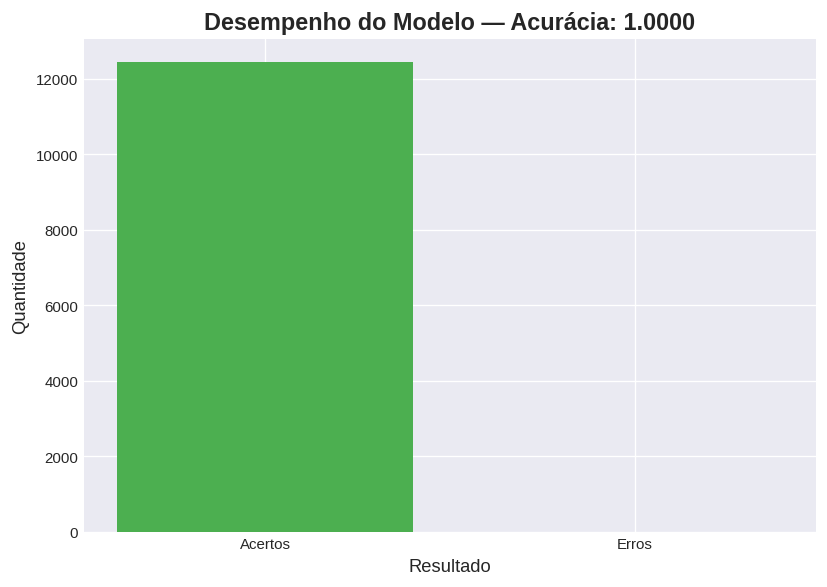

In [75]:

# Calcular acurácia e quantidade de acertos
acuracia = accuracy_score(y_test, y_pred)
acertos = (y_test == y_pred).sum()
erros = (y_test != y_pred).sum()

# Gráfico
plt.figure(figsize=(7,5))
plt.bar(["Acertos", "Erros"], [acertos, erros], color=["#4caf50", "#e91e63"])

# Título com acurácia
plt.title(f"Desempenho do Modelo — Acurácia: {acuracia:.4f}")

plt.ylabel("Quantidade")
plt.xlabel("Resultado")
plt.tight_layout()
plt.show()
